# Main Figures

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec
from matplotlib.markers import MarkerStyle
from matplotlib import ticker as mticker
from matplotlib.ticker import LogLocator, MultipleLocator
import glob
import re
from scipy.interpolate import griddata
from scipy.optimize import least_squares
from scipy.interpolate import interp1d 
from scipy.interpolate import interp2d 
import sys
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects
from matplotlib.colors import LogNorm
from scipy.interpolate import splrep, splev
from numpy import linalg as LA
import csv
import os
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

def exit(): 
    raise StopExecution

def colors(alpha):
    colors = [
    (0.0, 0.45, 0.7, alpha),   # Strong Blue
    (0.9, 0.6, 0.0, alpha),    # Bright Orange
    (0.0, 0.6, 0.5, alpha),    # Teal
    (0.8, 0.4, 0.0, alpha),    # Deep Orange
    (0.6, 0.3, 0.6, alpha),    # Purple
    (0.2, 0.8, 0.2, alpha),    # Bright Green
    (0.9, 0.9, 0.3, alpha),    # Yellow-Gold
    (0.35, 0.7, 0.9, alpha),   # Sky Blue
    (0.7, 0.2, 0.1, alpha),    # Reddish Brown
    (0.7, 0.6, 0.1, alpha)     # Olive Green
    ]
    return colors





# Fig 1- Topological distribution of batches and their PDIs

In [2]:
def read_molecule_data_into_columns(filename):
    molecules = {}  # Dictionary to hold data for each molecule
    
    current_molecule = None
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        
        for row in reader:
            # Strip any leading/trailing whitespace
            row = [r.strip() for r in row]
            
            if not row:  # Skip empty lines
                continue

            if row[0].startswith("Mol-"):  # Detect molecule entry (e.g., Mol-1, Mol-2)
                current_molecule = row[0]
                # Initialize 9 empty lists (one for each column)
                molecules[current_molecule] = {i: [] for i in range(9)}
            elif current_molecule is not None and len(row) >= 9:  # Ensure the row has at least 9 entries
                # Convert entries to integers and append them to the respective column
                try:
                    row_data = list(map(int, row[:9]))  # Only consider the first 9 columns
                    for i, val in enumerate(row_data):
                        molecules[current_molecule][i].append(val)  # Append to the appropriate column
                except ValueError:
                    continue  # If there's a conversion error, skip the row

    return molecules

def calculate_distribution(molecule_data):
    
    
    dendtitic_num=[]
    linear_num=[]
    terminal_num=[]
    #If you want to not include the linear part remove typ.count(-1) and add -data[1][typ==-1][0]  in tot_len
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0]
        tot_length=sum(data[1])-linear_seg_len
        dendtitic_num.append(typ.count(0)+1) 
        terminal_num.append(typ.count(1))  #+typ.count(-1)
        linear_num.append(tot_length-dendtitic_num[-1]-terminal_num[-1])

    dendtitic_num=np.array(dendtitic_num)
    linear_num=np.array(linear_num)
    terminal_num=np.array(terminal_num)

    db=2*dendtitic_num/(2*dendtitic_num+linear_num)

    return db
    
    
pt_batch = '../results/micelles/LHBC/dw_*/batch*/hyperbranched_data/topology_data.dat'
pt_all = '../results/micelles/LHBC/dw_*/all_batch/hyperbranched_data/topology_data.dat'

filesbatch = np.array(glob.glob(pt_batch))
filesall= np.array(glob.glob(pt_all))

dws_batch = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesbatch])
batches= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[1]) for i in filesbatch])

dws_all = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesall])

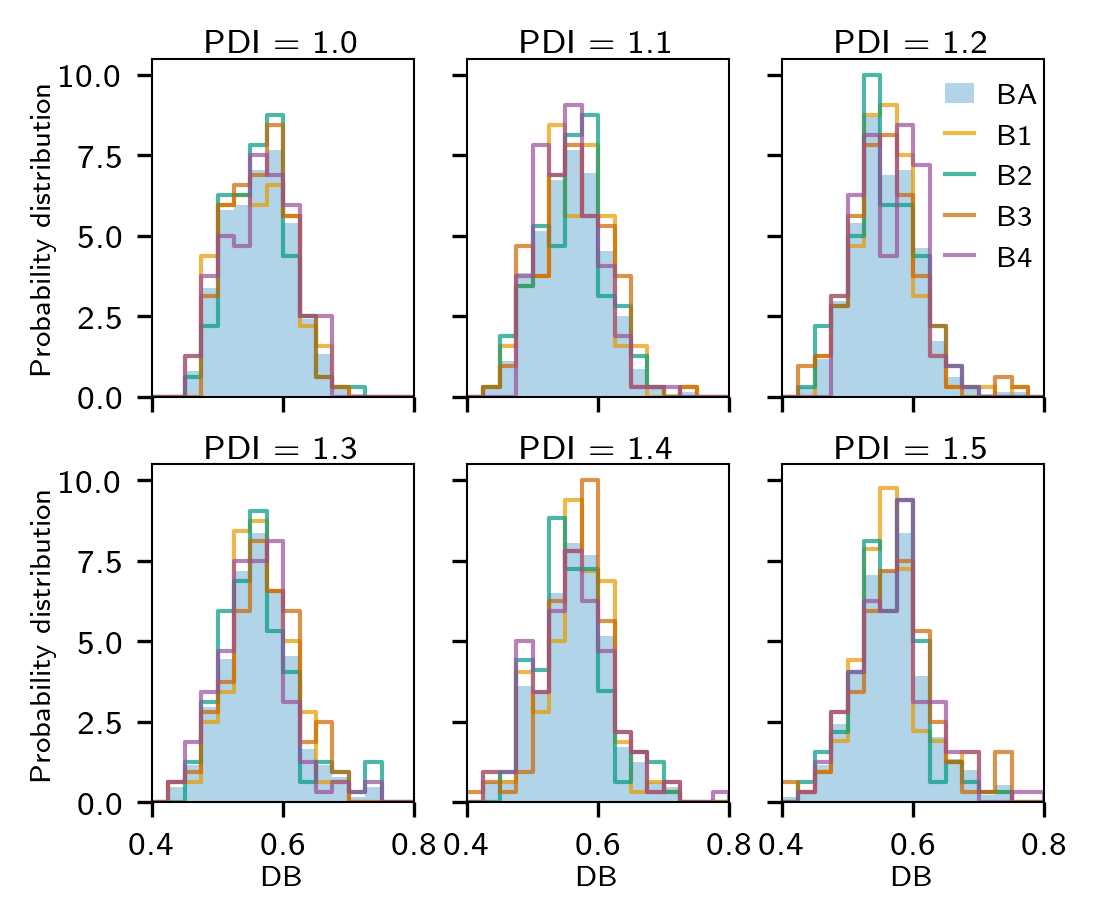

In [3]:
#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.2
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,3,  left=0.12 ,bottom=0.1, right=.97,top=.95)




alpha_pl_cl=0.3
alpha_cl=0.7
pl_cl=colors(alpha_pl_cl)
cl=colors(alpha_cl)

axes=[[],[]]
for i in range(1,-1,-1):
    for j in range(0,3):
        
        if i==0: 
            if j>=1:
                ax=plt.subplot(gs1[i,j],sharey=axes[i][0],sharex=axes[1][j])
                for label in ax.get_yticklabels():
                    label.set_visible(False)
                for label in ax.get_xticklabels():
                    label.set_visible(False)
            else:
                ax=plt.subplot(gs1[i,j],sharex=axes[1][j])
                for label in ax.get_xticklabels():
                    label.set_visible(False)
    
        else:
            if j>=1:
                ax=plt.subplot(gs1[i,j],sharey=axes[i][0])
                for label in ax.get_yticklabels():
                    label.set_visible(False)
            else:
                ax=plt.subplot(gs1[i,j])


        
        axes[i].append(ax)

dw_chosen=[1.0,1.1,1.2,1.3,1.4,1.5]
batch_chosen=[1,2,3,4]

bins=np.arange(0.4,1.0,0.025)


for k in range(0,len(dw_chosen)):
    
    dw=dw_chosen[k]
#     print(dw_chosen[k])
    if k<=2:
        i=0
        j=k
    else:
        i=1
        j=k-3
        
    ax=axes[i][j]
   
    filename=filesall[dws_all==dw][0]
    molecule_data=read_molecule_data_into_columns(filename)
    db=calculate_distribution(molecule_data)
    mean_db=np.mean(db)
    std_db=np.std(db)
    
    lab=str(round(mean_db,2))+r"$\pm$"+str(round(std_db,2))
    lab1="BA"

#     print(lab)
    ax.hist(db, bins=bins,color=pl_cl[0],density=True,label=lab1)
#     n, bins, patches = ax.hist(db, bins=bins, density=True, alpha=0)  # Alpha=0 makes bars invisible
#     ax.step(bins[:-1], n, where='mid', color=pl_cl[0], label=lab)
    for batch in batch_chosen:
        
        filename=filesbatch[(dws_batch==dw) & (batches==batch)][0]
        molecule_data=read_molecule_data_into_columns(filename)
        db=calculate_distribution(molecule_data)
        mean_db=np.mean(db)
        std_db=np.std(db)

        lab=str(round(mean_db,2))+r"$\pm$"+str(round(std_db,2))
#         print(lab)
#         ax.hist(db, bins=bins,density=True,edgecolor=cl[batch],color=pl_cl[batch],label=lab)
        # Create histogram without the bars (set `histtype='step'`)
        # Plot the histogram but don't show the bars (set only density and bins)
        lab1="B"+str(batch)
        n, bins, patches = ax.hist(db, bins=bins, density=True, alpha=0)  # Alpha=0 makes bars invisible
        ax.step(bins[:-1], n, where='post', color=cl[batch], label=lab1)
        
#         print(np.mean(db))
#         print(np.std(db))
             




for i in range(1,-1,-1):
    for j in range(0,3):
        if i==0:
            ax_titl= "PDI = "+ str(dw_chosen[j]) 
        else:
            ax_titl= "PDI = "+ str(dw_chosen[3+j]) 

#         titl = r"$\underline{\mathrm{ DB}}$"
        
        if i==1:
            axes[i][j].set_xlabel("DB",labelpad=1.0)
            axes[i][j].set_xticks(np.arange(0.4,1.0,0.2))

            axes[i][j].set_xlim(0.4,0.8)
 
        if j==0:
            axes[i][j].set_ylabel("Probability distribution",labelpad=1.0)
            
        axes[i][j].set_title(ax_titl,pad=1.0)

axes[0][2].legend(frameon=False,loc='center',bbox_to_anchor=(0.8, 0.65),handlelength=1, ncol=1)
       
        

plt.savefig("Main_figures/branching_distributions.pdf",dpi=300)

# Fig 2 - CMCS of LHBC ,LDBC and linear for Sphere, Cylindrical and Lamallae

In [13]:
import matplotlib.patches as patches

def read_molecule_data_into_columns(filename):
    molecules = {}  # Dictionary to hold data for each molecule
    
    current_molecule = None
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        
        for row in reader:
            # Strip any leading/trailing whitespace
            row = [r.strip() for r in row]
            
            if not row:  # Skip empty lines
                continue

            if row[0].startswith("Mol-"):  # Detect molecule entry (e.g., Mol-1, Mol-2)
                current_molecule = row[0]
                # Initialize 9 empty lists (one for each column)
                molecules[current_molecule] = {i: [] for i in range(9)}
            elif current_molecule is not None and len(row) >= 9:  # Ensure the row has at least 9 entries
                # Convert entries to integers and append them to the respective column
                try:
                    row_data = list(map(int, row[:9]))  # Only consider the first 9 columns
                    for i, val in enumerate(row_data):
                        molecules[current_molecule][i].append(val)  # Append to the appropriate column
                except ValueError:
                    continue  # If there's a conversion error, skip the row

    return molecules

def calculate_distribution(molecule_data):
    
    
    dendtitic_num=[]
    linear_num=[]
    terminal_num=[]
    #If you want to not include the linear part remove typ.count(-1) and add -data[1][typ==-1][0]  in tot_len
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0]
        tot_length=sum(data[1])-linear_seg_len
        dendtitic_num.append(typ.count(0)+1) 
        terminal_num.append(typ.count(1))  #+typ.count(-1)
        linear_num.append(tot_length-dendtitic_num[-1]-terminal_num[-1])

    dendtitic_num=np.array(dendtitic_num)
    linear_num=np.array(linear_num)
    terminal_num=np.array(terminal_num)

    db=2*dendtitic_num/(2*dendtitic_num+linear_num)

    return db

def calculate_length_distribution(molecule_data):
    
    
    lengths=[]
    for molecule, data in molecule_data.items(): 
        typ=data[2]
        linear_seg_len=np.array(data[1])[np.array(typ)==-1][0] #removing linear segment
        tot_length=sum(data[1])-linear_seg_len
        lengths.append(tot_length)
    
    

    return np.array(lengths)

pt1d= '../results/micelles/LHBC/dw_*/SCF_runs_1d/batch_*/phi_runs/all_details.dat'
pt2d= '../results/micelles/LHBC/dw_*/SCF_runs_2d/batch_*/phi_runs/all_details.dat'
pt3d= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/all_details.dat'


files1d = np.array(glob.glob(pt1d))
files2d = np.array(glob.glob(pt2d))
files3d = np.array(glob.glob(pt3d))


dws1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d])
dws2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d])
dws3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d])

batches1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in files1d])
batches2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in files2d])
batches3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in files3d])

batches_num=len(np.unique(batches3d))


pt1d_ldbc= '../results/micelles/LDBC/gen*/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_ldbc= '../results/micelles/LDBC/gen*/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_ldbc= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/all_details.dat'


files1d_ldbc = np.array(glob.glob(pt1d_ldbc))
files2d_ldbc = np.array(glob.glob(pt2d_ldbc))
files3d_ldbc = np.array(glob.glob(pt3d_ldbc))


gen1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d_ldbc])
gen2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d_ldbc])
gen3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d_ldbc])


gen_num=len(np.unique(gen3d))




pt1d_linear= '../results/micelles/linear/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_linear= '../results/micelles/linear/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_linear= '../results/micelles/linear/SCF_runs_3d/phi_runs/all_details.dat'


files1d_linear = np.array(glob.glob(pt1d_linear))
files2d_linear = np.array(glob.glob(pt2d_linear))
files3d_linear = np.array(glob.glob(pt3d_linear))



pt_all_topo = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/hyperbranched_data/topology_data.dat'
pt_all_weights = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/hyperbranched_data/weights.dat'
pt_all_micelle_weights = '../results/micelles/LHBC/dw_*/*/all_batch/p*/c*/p*/analysis/new*/we*'

filesalltopo = np.array(glob.glob(pt_all_topo))
filesalloriweights = np.array(glob.glob(pt_all_weights))
filesallmicweights = np.array(glob.glob(pt_all_micelle_weights))

dws_all = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesalltopo])



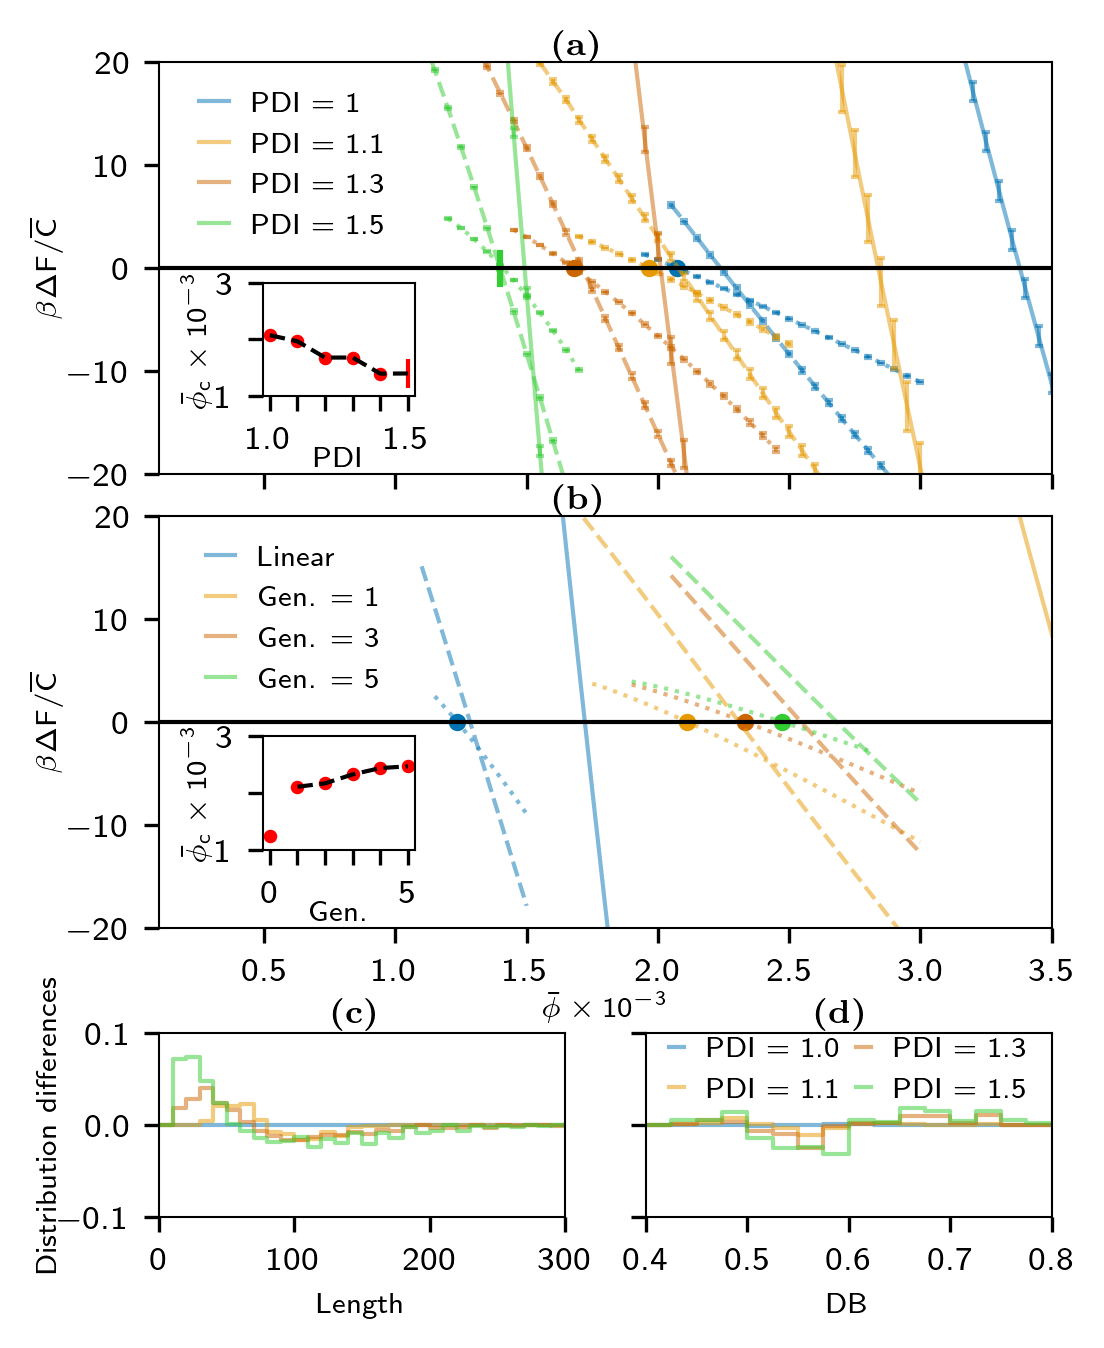

In [15]:

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions
 

def unionarrays(arrays):
    result = arrays[0]  # Start with the first array
    for array in arrays[1:]:
        result = np.union1d(result, array)  # Union of the current result with the next array
    return result


#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/0.8
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,1,  left=0.125, bottom=0.3, right=.975, top=.96,hspace=0.1 )
gs2=GridSpec(1,2,  left=0.125, bottom=0.08, right=.975, top=.22,wspace=0.2 )



ax0=plt.subplot(gs1[0,0])
ax1=plt.subplot(gs1[1,0])
ax20=plt.subplot(gs2[0,0])
ax21=plt.subplot(gs2[0,1],sharey=ax20)

pl_cl=colors(0.5)
cl=colors(1)







phibarss=[]
types=[] # 0 =vesicle 1=cylinder 2=sphere

mult=1e3
mult_phi=1e3

xlow=0.1e-3*mult_phi
xhigh=3.5e-3*mult_phi
ylow=-20
yhigh=20

#LHBC
symbols=['o','^','o'] 
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
dw_chosen=[1,1.1,1.2,1.3,1.4,1.5]
dw_plot=np.array([1,1.1,1.3,1.5])
sym_siz=[5,5,5]

for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    inter_pts_means=[]
    inter_pts_stds=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d
            dws=dws1d
            batches=batches1d
        if p==1:
            files=files2d
            dws=dws2d
            batches=batches2d
            
        if p==2:
            files=files3d
            dws=dws3d
            batches=batches3d
        
        inter_full=[]
        edif_full=[]  
        phis_full=[]
        
        for j in range(0,batches_num): #looping over batches

            batch=j+1


            fil=files[(dws==dw_chosen[i]) & (batches==batch)][0]
            dat=np.loadtxt(fil,skiprows=0)
            volume=dat[:,9]
            phibar=dat[:,16]
            edif=dat[:,17]*volume #edif is already divided by volume
            stat=dat[:,0]

            phibar=phibar[abs(edif)>=1e-5]
            stat=stat[abs(edif)>=1e-5]
            edif=edif[abs(edif)>=1e-5]

            
            inter_pt=inverse_interp(phibar[stat==0],edif[stat==0],0)[-1]
    
            inter_full.append(inter_pt)
    

            edif[stat!=0]=np.nan #simulation that didnt converge coreectly are not accounted in the mean and std calc
            phibar[stat!=0]=np.nan
            edif_full.append(edif)
            phis_full.append(phibar)

#         ax.plot(phibar[stat3d==0],edif[stat==0]*mult,linestyle='-',c=pl_cl[batch],label=' Batch '+str(batch))
        
 

        phisunion=unionarrays(phis_full) #Each phi might have different amount of correctly converged number of batches 
        for k in range(0,batches_num):
            phi_temp=phis_full[k]
            edif_temp=edif_full[k]
    
            edif_replacement=np.zeros(len(phisunion))

            elem=np.isin(phisunion,phi_temp)


            edif_replacement[elem]=edif_temp #Replacing elements that exist in union with batch elements
            edif_replacement[~elem]=np.nan #Replacing non-existent elements with nan
            edif_full[k]=edif_replacement


        inter_mean=np.mean(np.array(inter_full))
        inter_std=np.std(np.array(inter_full))

        inter_pts_means.append(inter_mean)
        inter_pts_stds.append(inter_std)

        edif_mean=np.nanmean(np.array(edif_full),axis=0)
        edif_std=np.nanstd(np.array(edif_full),axis=0)

        lab="PDI = "+str(dw_chosen[i])


        edif_std=edif_std[~np.isnan(np.array(edif_mean))]
        edif_mean=edif_mean[~np.isnan(np.array(edif_mean))]
        if np.isin(dw_chosen[i],dw_plot):
            if p==0:
                ax0.plot(phisunion*mult_phi,np.array(edif_mean),linestyle=linstyl[p],c=pl_cl[i],label=lab)
            else:
                ax0.plot(phisunion*mult_phi,np.array(edif_mean),linestyle=linstyl[p],c=pl_cl[i])

            ax0.errorbar(phisunion[edif_std!=0]*mult_phi, edif_mean[edif_std!=0], edif_std[edif_std!=0], fmt='none', capsize=1, elinewidth=1, capthick=1,c=pl_cl[i])



    
    pt=np.argmin(np.array(inter_pts_means))
    
    phibarss.append(inter_pts_means[pt])
    types.append(pt)
        
    x=[inter_pts_means[pt]]
    y=0
    if np.isin(dw_chosen[i],dw_plot):
        if pt==2:
            ax0.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[i], edgecolors=cl[i])  
        elif pt ==1 :
            rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[i],facecolor=cl[i],transform=ax0.transAxes)
            ax0.add_patch(rect)
        else:
            ax0.scatter(x[0],y,marker=symbols[pt],c=cl[i],s=10,facecolors='None')  
    
#Linear

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d


inter_full=[]

for p in range(0,3): #looping over geometries
    if p==0:
        files=files1d_linear
    if p==1:
        files=files2d_linear
    if p==2:
        files=files3d_linear


    edif_full=[]  
    phis_full=[]


    fil=files[0]
    dat=np.loadtxt(fil,skiprows=0)
    volume=dat[:,9]
    phibar=dat[:,16]
    edif=dat[:,17]*volume
    stat=dat[:,0]

    phibar=phibar[abs(edif)>=1e-5]
    stat=stat[abs(edif)>=1e-5]
    edif=edif[abs(edif)>=1e-5]

    phibar=phibar[stat==0]
    edif=edif[stat==0]

    inter_pt=inverse_interp(phibar,edif,0)[-1]
    inter_full.append(inter_pt)


    if p==0:
        ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[0],label='Linear')

    else:
        ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[0])


pt=np.argmin(np.array(inter_full))
x=[inter_full[pt]]

phibarss.append(inter_full[pt])
types.append(pt)

y=0
if pt==2:
    ax1.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[0], edgecolors=cl[0])  
elif pt ==1 :
    rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[0],facecolor=cl[0],transform=ax1.transAxes)
    ax1.add_patch(rect)
else:
    ax1.scatter(x[0],y,marker=symbols[pt],c=cl[0],s=10,facecolors='None')      
    

#LDBC

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
gen_chosen=[1,2,3,4,5]
gen_plot=np.array([1,3,5])

for i in range(0,len(gen_chosen)):  #looping over PDIs
  

    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d_ldbc
            gen=gen1d
        if p==1:
            files=files2d_ldbc
            gen=gen2d
        if p==2:
            files=files3d_ldbc
            gen=gen3d
          
        
        edif_full=[]  
        phis_full=[]
        
       
        fil=files[(gen==gen_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        volume=dat[:,9]
        phibar=dat[:,16]
        edif=dat[:,17]*volume
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]

        phibar=phibar[stat==0]
        edif=edif[stat==0]
        inter_pt=inverse_interp(phibar,edif,0)[-1]
        inter_full.append(inter_pt)

        if np.isin(gen_chosen[i],gen_plot):
            if p==0:
                ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[i+1],label='Gen. = '+str(gen_chosen[i]))

            else:
                ax1.plot(phibar*mult_phi,edif,linestyle=linstyl[p],c=pl_cl[i+1])
 

    pt=np.argmin(np.array(inter_full))
    x=[inter_full[pt]]
    y=0
    
    if np.isin(gen_chosen[i],gen_plot):
        if pt==2:
            ax1.scatter(x[0]*mult_phi,y,marker='o',s=10,facecolors=cl[i+1], edgecolors=cl[i+1])  
        elif pt ==1 :
            rect = patches.Rectangle( ((x[0]*mult_phi-xlow)/(xhigh-xlow)-0.0015, 0.5-0.04),0.003,0.08,edgecolor=cl[i+1],facecolor=cl[i+1],transform=ax1.transAxes)
            ax1.add_patch(rect)
        else:
            ax1.scatter(x[0],y,marker=symbols[pt],c=cl[i+1],s=10,facecolors='None')      
    
    phibarss.append(inter_full[pt])
    types.append(pt)





#Rest of plotting parameters    
zero_line=np.linspace(1e-4,1e-2,100)*mult_phi
edifzeros=np.zeros(len(zero_line))
ax1.plot(zero_line,edifzeros,c='black')   
ax0.plot(zero_line,edifzeros,c='black')   

ax1.set_xlabel(r"$\mathrm{\Bar{\phi}\times 10^{-3}}$",labelpad=1.0)
ax0.set_ylabel(r"$\mathrm{\beta\Delta F / \overline{C}} $",labelpad=1.0)
ax1.set_ylabel(r"$\mathrm{\beta\Delta F / \overline{C}} $",labelpad=1.0)

# ax.set_xscale('log')
ax0.set_ylim(ylow,yhigh)
ax0.set_xlim(xlow,xhigh)
ax1.set_ylim(ylow,yhigh)
ax1.set_xlim(xlow,xhigh)

ax0.legend(frameon=False,loc='center',bbox_to_anchor=(0.15, 0.75),handlelength=1, ncol=1)
ax1.legend(frameon=False,loc='center',bbox_to_anchor=(0.15, 0.75),handlelength=1, ncol=1)

for label in ax0.get_xticklabels():
    label.set_visible(False)

    
#Inset axes
sym_siz=[5,5,5]

inset_axes0 = inset_axes(ax0,width="100%", height="100%", loc='upper left',
bbox_to_anchor=(0.1,1-0.775,.17,.275), bbox_transform=ax0.transAxes)

    
inset_axes0.plot(dw_chosen,np.array(phibarss[0:len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   

for i in range(0,len(dw_chosen)):
    
    pt=types[i]
    x=dw_chosen[i]
    y=phibarss[i]*mult_phi
    if pt==2:
        inset_axes0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.25), 0.0001, 0.5,edgecolor='red',facecolor='red')
        inset_axes0.add_patch(rect)
        
inset_axes0.set_xticks(dw_chosen)
inset_axes0.set_xticklabels([1.0,"","","","",1.5])  # Empty x tick labels
inset_axes0.set_yticks([1,2,3]) 
inset_axes0.set_yticklabels([1,"",3])  # Empty x tick labels

inset_axes0.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0)
inset_axes0.set_xlabel(r"PDI",labelpad=-2.0) 



genss=[0]+gen_chosen

inset_axes1 = inset_axes(ax1,width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.1,1-0.775,.17,.275), bbox_transform=ax1.transAxes)

for i in range(len(dw_chosen),len(dw_chosen)+len(genss)):
    
    pt=types[i]
    x=genss[i-len(dw_chosen)]
    y=phibarss[i]*mult_phi
    if pt==2:
        inset_axes1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.25), 0.0001, 0.5,edgecolor='red',facecolor='red')
        inset_axes1.add_patch(rect)

inset_axes1.plot(genss[0],np.array(phibarss[len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)        
inset_axes1.plot(genss[1:],np.array(phibarss[len(dw_chosen)+1:])*mult_phi,linestyle='--',c='black',markersize=1)        
# inset_axes1.plot(genss,np.array(phibarss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
inset_axes1.set_xticks(genss)
inset_axes1.set_xticklabels([0,"","","","",5])  # Empty x tick labels
inset_axes1.set_yticks([1,2,3]) 
inset_axes1.set_yticklabels([1,"",3])  # Empty x tick labels

inset_axes1.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0)
inset_axes1.set_xlabel(r"Gen.",labelpad=-2.0)



#Plot for distribution differences


bins_db=np.arange(0.4,0.9,0.025)
bins_len=np.arange(0,320,10)


for i in range(0,len(dw_plot)):
    
    dw=dw_plot[i]
    
    j=np.where(dw_chosen==dw)[0][0]
    filename=filesalltopo[dws_all==dw][0]
    molecule_data=read_molecule_data_into_columns(filename)
    dbs=calculate_distribution(molecule_data)
    lengths=calculate_length_distribution(molecule_data)


    
    fil=filesalloriweights[dws_all==dw][0]
    weights_ori=np.loadtxt(fil)
    fil=filesallmicweights[dws_all==dw][0]
    weights_mic=np.loadtxt(fil)


    lab1="PDI = "+str(dw)
      
    n, bins, patches0 = ax0.hist(lengths, bins=bins_len, alpha=0,weights=weights_mic-weights_ori)  # Alpha=0 makes bars invisible
    ax20.step(bins[:-1], n, where='post', color=pl_cl[j], label=lab1)

    n, bins, patches0 = ax1.hist(dbs, bins=bins_db, alpha=0,weights=weights_mic-weights_ori)  # Alpha=0 makes bars invisible
    ax21.step(bins[:-1], n, where='post', color=pl_cl[j], label=lab1)

ax20.set_xlabel("Length")
ax21.set_xlabel("DB")

ax20.set_ylabel("Distribution differences",labelpad=-1.0)

ax20.set_ylim(-0.1,0.1)
ax20.set_xlim(0,300)
ax21.set_xlim(0.4,0.8)

ax21.legend(frameon=False,loc='center',bbox_to_anchor=(0.5, 0.8),handlelength=0.5, ncol=2,columnspacing=0.5)

for label in ax21.get_yticklabels():
    label.set_visible(False)

fig.text(0.5,0.972,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.5,0.626,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')

fig.text(0.29,0.235,r'\bf{(c) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.75,0.235,r'\bf{(d) }', horizontalalignment='left', verticalalignment='center')

plt.savefig("Main_figures/phibar_vs_edif_hyper_dws.pdf")

# Fig 3 - Volume fraction of micelles for different PDIs, linear and LDBC 

In [16]:
import scipy

def volume_integral(rad, vol,cutoff):
    
    sorted_indices = np.argsort(rad)
    rad = rad[sorted_indices]
    vol = vol[sorted_indices]
    
    vol=vol[rad<=cutoff]
    rad=rad[rad<=cutoff]
    
    integrand = rad**2 * vol  
    integral = scipy.integrate.simpson(integrand, rad)
    result = 4 * np.pi * integral
    
    return result



#For left plot
ptlhbc= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/chosen_case/phibar_*/data/x_cen*'
ptldbc= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/data/x_cen*'
ptlinear= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/data/x_cen*'

ptlhbc_ends= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'
ptldbc_ends= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'
ptlinear_ends= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/analysis/terminal_distributions/mol*'


fileslhbc = np.array(glob.glob(ptlhbc))
filesldbc = np.array(glob.glob(ptldbc))
fileslinear = np.array(glob.glob(ptlinear))


dws = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc])
batches = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc])
gens= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbc])
batches_num=len(np.unique(batches))    


#For right plot

fileslhbc_ends = np.array(glob.glob(ptlhbc_ends))
filesldbc_ends = np.array(glob.glob(ptldbc_ends))
fileslinear_ends = np.array(glob.glob(ptlinear_ends))


dws_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc_ends])
batches_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc_ends])
mol_id_ends = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in fileslhbc_ends])
gens_ends= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbc_ends])
batches_num_ends=len(np.unique(batches_ends)) 
mol_id_num=len(np.unique(mol_id_ends)) 



Average number of chain ends in each chain compared to linear
[23.15767332 21.65038171 19.74222548 19.02232237 17.22152937  1.
  1.99859533  4.00335849  8.01660848 16.02623072 32.0390197 ]


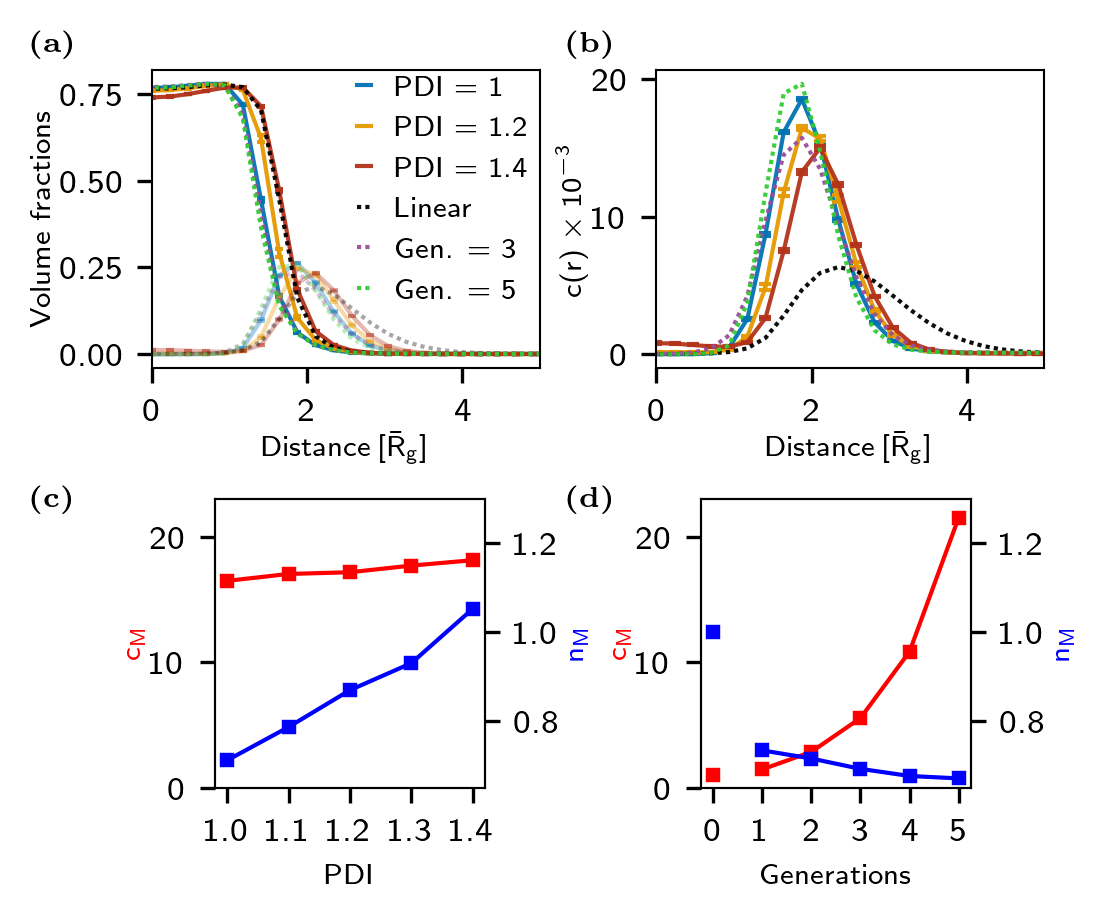

In [17]:
#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.2
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=7)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(1,2,  left=0.12, bottom=0.6, right=.97, top=.94, wspace=0.3 )

gs2=GridSpec(1,2,  left=0.18, bottom=0.12, right=.9, top=.45, wspace=0.8 )

a_pl=0.95
pl_cl=colors(a_pl)
pl_cl[2]=(0.7, 0.2, 0.1, a_pl)
pl_cl[3]=(0, 0, 0, a_pl)

a_cl=0.35
cl=colors(a_cl)
cl[2]=(0.7, 0.2, 0.1, a_cl)
cl[3]=(0, 0, 0, a_cl)

linstyl=['-','-',(0, (1, 1)),(0, (1, 1))] # - = 1d , -- = 2d , dotted=3d


cutoff=6.0 #cutoff for voume integral

lin_chain=84.0 #Linear solvophobic chain length
aver_chain=np.array([168.0,168.1,166.3,167.6,165.4,168.0,168.0,168.0,168.0,168.0,168.0])

#Left plot
ax=plt.subplot(gs1[0,0])

dw_chosen=[1,1.1,1.2,1.3,1.4]
dw_show=np.array([1,1.2,1.4])
mult=1e0

tot_mic_vol=[]

#LHBC part
k=0
for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    phi1s=[]
    phi2s=[]
    for j in range(0,batches_num): #looping over batches

        batch=j+1
        fil=fileslhbc[(dws==dw_chosen[i]) & (batches==batch)][0]
        dat=np.loadtxt(fil,skiprows=0)
        distance=dat[:,0]
        phi1=dat[:,1]
        phi2=dat[:,2]
        phi1s.append(phi1)
        phi2s.append(phi2)
        
        
    phi1_mean=np.nanmean(np.array(phi1s),axis=0)
    phi1_std=np.nanstd(np.array(phi1s),axis=0)
    phi2_mean=np.nanmean(np.array(phi2s),axis=0)
    phi2_std=np.nanstd(np.array(phi2s),axis=0)

    phi1_mean=phi1_mean[distance>=-0.0000001]
    phi2_mean=phi2_mean[distance>=-0.0000001]
    phi1_std=phi1_std[distance>=-0.0000001]
    phi2_std=phi2_std[distance>=-0.0000001]   
    distance=distance[distance>=-0.0000001]
    
    tot_mic_vol.append(volume_integral(distance,phi1_mean,cutoff))
    lab="PDI = "+str(dw_chosen[i])

    if np.any(dw_show == dw_chosen[i]):
        ax.plot(distance,phi1_mean,linestyle=linstyl[0],c=pl_cl[k],label=lab)
        ax.plot(distance,phi2_mean,linestyle=linstyl[1],c=cl[k])
        ax.errorbar(distance,phi1_mean, phi1_std, fmt='none', capsize=1, elinewidth=1, capthick=1,c=pl_cl[k])
        ax.errorbar(distance,phi2_mean, phi2_std, fmt='none', capsize=1, elinewidth=1, capthick=1,c=cl[k])
        k+=1

        
#Linear part    
fil=fileslinear[0]
dat=np.loadtxt(fil,skiprows=0)
distance=dat[:,0]
phi1=dat[:,1]
phi2=dat[:,2]

phi1=phi1[distance>=-0.0000001]
phi2=phi2[distance>=-0.0000001]   
distance=distance[distance>=-0.0000001]

lab="Linear"
tot_mic_vol.append(volume_integral(distance,phi1,cutoff))

k=len(dw_show)
ax.plot(distance,phi1,linestyle=linstyl[2],c=pl_cl[k],label=lab)
ax.plot(distance,phi2,linestyle=linstyl[3],c=cl[k])    
    
        
    
#LDBC part
gen_chosen=[1,2,3,4,5]
gen_show=np.array([3,5])

k=len(dw_show)+1
for i in range(0,len(gen_chosen)):
    
    fil=filesldbc[(gens==gen_chosen[i]) ][0]
    dat=np.loadtxt(fil,skiprows=0)
    distance=dat[:,0]
    phi1=dat[:,1]
    phi2=dat[:,2]

    phi1=phi1[distance>=-0.0000001]
    phi2=phi2[distance>=-0.0000001]   
    distance=distance[distance>=-0.0000001]
    
    lab="Gen. = "+str(gen_chosen[i])
    tot_mic_vol.append(volume_integral(distance,phi1,cutoff))

    if np.any(gen_show == gen_chosen[i]):
        
        ax.plot(distance,phi1,linestyle=linstyl[2],c=pl_cl[k],label=lab)
        ax.plot(distance,phi2,linestyle=linstyl[3],c=cl[k])
        k+=1
    

    
    
  
    
ax.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)
ax.set_ylabel(r"Volume fractions",labelpad=1.0)
ax.set_xlim(0,5)


ax.legend(frameon=False,loc='center',bbox_to_anchor=(0.75, 0.6),handlelength=0.5, ncol=1)







# dat_cr=[]



#Right plot
mult_ch=1e3
ax=plt.subplot(gs1[0,1])
# mult=1e

tot_int=[]

#LHBC part
p=0
for i in range(0,len(dw_chosen)):  #looping over PDIs
    chain_ends_batch=[]  
    for j in range(0,batches_num_ends): #looping over batches
        batch=j+1
        chain_ends_per_mol=[]
        for k in range(0,mol_id_num): #looping over each molecule

            mol_id=k+1
#             print(str(dw_chosen[i])+" "+str(batch)+" "+str(mol_id)+" ")
            fil=fileslhbc_ends[(dws_ends==dw_chosen[i]) & (batches_ends==batch) & (mol_id_ends==mol_id)][0]
            dat=np.loadtxt(fil,skiprows=1)
#             if i==0 and j==0 and k==0:
            distance=dat[:,0]
            
            chain_end=dat[:,1]
            chain_ends_per_mol.append(chain_end)
            
            if len(chain_end) != 64:
            
                print("batch_"+ str(batch)+" mol id "+str(mol_id))
                print(len(chain_end))
            
            
        chain_ends_batch.append(np.sum(np.array(chain_ends_per_mol),axis=0))

        
    
    chain_ends_means=np.nanmean(np.array(chain_ends_batch),axis=0)
    chain_ends_stds=np.nanstd(np.array(chain_ends_batch),axis=0)
    

    lab="PDI = "+str(dw_chosen[i])+ "   "
    
    chain_ends_means=chain_ends_means[distance>=-0.0000001]
    chain_ends_stds=chain_ends_stds[distance>=-0.0000001]
    distance=distance[distance>=-0.0000001]

    tot_int.append(volume_integral(distance,chain_ends_means,cutoff))
    norm=volume_integral(distance,chain_ends_means,cutoff)
#     if i==0:
#         dat_cr.append(distance)

    if np.any(dw_show == dw_chosen[i]): 
#         dat_cr.append(chain_ends_means)
        ax.plot(distance,chain_ends_means/norm*mult_ch,linestyle=linstyl[1],c=pl_cl[p])
        ax.errorbar(distance,chain_ends_means/norm*mult_ch, chain_ends_stds/norm*mult_ch, fmt='none', capsize=1.5, elinewidth=1, capthick=1,c=pl_cl[p])
        p+=1


#Linear part    
fil=fileslinear_ends[0]
dat=np.loadtxt(fil,skiprows=1)
distance=dat[:,0]
chain_end=dat[:,1]

chain_end=chain_end[distance>=-0.0000001]
distance=distance[distance>=-0.0000001]
# dat_cr.append(chain_end)

lab="Linear"
tot_int.append(volume_integral(distance,chain_end,cutoff))
norm=volume_integral(distance,chain_end,cutoff)

k=len(dw_show)
# ax.legend(frameon=False,loc='center',bbox_to_anchor=(0.75, 0.65),handlelength=0.25, ncol=1)

ax.plot(distance,chain_end/norm*mult_ch,linestyle=linstyl[3],c=pl_cl[k])
        
#LDBC part
k=len(dw_show)+1
for i in range(0,len(gen_chosen)):
    
    fil=filesldbc_ends[(gens==gen_chosen[i]) ][0]
    dat=np.loadtxt(fil,skiprows=1)
    distance=dat[:,0]
    chain_end=dat[:,1]

    chain_end=chain_end[distance>=-0.0000001]
    distance=distance[distance>=-0.0000001]

    lab="Gen = "+str(gen_chosen[i])+ "   "
    tot_int.append(volume_integral(distance,chain_end,cutoff))
    norm=volume_integral(distance,chain_end,cutoff)
    if np.any(gen_show == gen_chosen[i]): 
#         dat_cr.append(chain_end)

        ax.plot(distance,chain_end/norm*mult_ch,linestyle=linstyl[3],c=pl_cl[k])
        k+=1

        
        
ax.set_xlim(0,5)
ax.set_xlabel(r'$\mathrm{Distance \, [\bar{R}_{g}]}$',labelpad=1.0)
ax.set_ylabel(r"$\mathrm{c(r)\times10^{-3}}$",labelpad=1.0)
# indi_sort=np.argsort(dat_cr[0])
# for i in range(0,len(dat_cr)):
#     dat_cr[i]=dat_cr[i][indi_sort]
    
# np.savetxt('c_r.dat',np.array(dat_cr).T,header='1.Distance 2.PDI 1.0 3.PDI 1.2 4.PDI 1.4 5.Gen=0 6.Gen=2 7.Gen=4 8.Gen=5 ')



#Bottom plots


tot_int=np.array(tot_int)
tot_int=tot_int
tot_mic_vol=np.array(tot_mic_vol)

tot_int=tot_int/tot_int[len(dw_chosen)] #everything is normalised to the linear diblock
tot_mic_vol=tot_mic_vol/tot_mic_vol[len(dw_chosen)]

print("Average number of chain ends in each chain compared to linear")
print(tot_int/tot_mic_vol)




ax0=plt.subplot(gs2[0,0])
ax1=plt.subplot(gs2[0,1])

ax01=ax0.twinx()
ax11=ax1.twinx()

genns=[0]+gen_chosen

ax0.plot(dw_chosen,tot_int[0:len(dw_chosen)],linestyle='-',c='red',marker='s',markersize=1)
ax01.plot(dw_chosen,tot_mic_vol[0:len(dw_chosen)],linestyle='-',c='blue',marker='s',markersize=1)

ax1.plot(genns[0],tot_int[len(dw_chosen)],marker='s',markersize=1,linestyle='-',c='red')
ax1.plot(genns[1:],tot_int[len(dw_chosen)+1:],marker='s',markersize=1,linestyle='-',c='red')
ax11.plot(genns[0],tot_mic_vol[len(dw_chosen)],linestyle='-',c='blue',marker='s',markersize=1)
ax11.plot(genns[1:],tot_mic_vol[len(dw_chosen)+1:],linestyle='-',c='blue',marker='s',markersize=1)

# ax1.plot(genns,tot_int[len(dw_chosen):],marker='s',markersize=1,linestyle='-',c='red')
# ax11.plot(genns,tot_mic_vol[len(dw_chosen):],linestyle='-',c='blue',marker='s',markersize=1)

ax0.set_ylim(0,23)
ax1.set_ylim(0,23)

ax01.set_ylim(0.65,1.3)
ax11.set_ylim(0.65,1.3)

ax01.set_ylabel(r"$\mathrm{n_M}$",c='blue',labelpad=1.0)
ax0.set_ylabel(r"$\mathrm{c_M}$",c='red',labelpad=1.0)

ax11.set_ylabel(r"$\mathrm{n_M}$",c='blue',labelpad=1.0)
ax1.set_ylabel(r"$\mathrm{c_M}$",c='red',labelpad=1.0)

ax0.set_xlabel("PDI")
ax1.set_xlabel("Generations")

ax0.set_xticks([1.0,1.1,1.2,1.3,1.4]) 
ax1.set_xticks([0,1,2,3,4,5]) 

fig.text(0.005,0.97,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.515,0.97,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')

fig.text(0.005,0.45,r'\bf{(c) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.515,0.45,r'\bf{(d) }', horizontalalignment='left', verticalalignment='center')
plt.savefig("Main_figures/volume_fractions_and_chain_ends.pdf")

# Fig 4 - Order of addition , Generation number and Mean distance

In [18]:

#Left plot
ptlhbc_all= '../results/micelles/LHBC/dw_*/SCF_runs_3d/all_batch/index_gens_info/mol*'
fileslhbc_all = np.array(glob.glob(ptlhbc_all))

dws_all= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc_all])
mol_ids_all= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc_all])


#Right plot
ptlhbc= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch*/phi_runs/chosen_case/p*/analysis/terminal_gen*/mol*'

fileslhbc = np.array(glob.glob(ptlhbc))


dws = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc])
batches = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslhbc])
mol_ids = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in fileslhbc])
batches_num=len(np.unique(batches))    

# mol_id_num=len(np.unique(mol_id_ends)) 

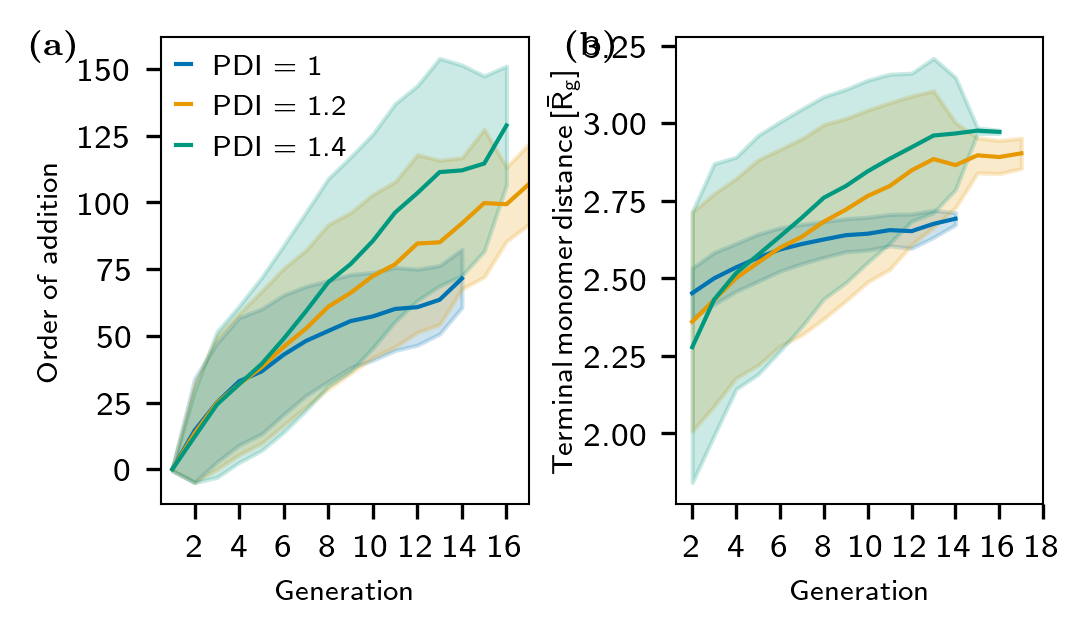

In [19]:
#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.8
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0,title_fontsize=7)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(1,2,  left=0.13, bottom=0.18, right=.97, top=.98, wspace=0.4 )

pl_cl=colors(0.5)

cl=colors(1)

linstyl=['-','--','dotted']



#Left plot
ax0=plt.subplot(gs1[0,0])
dw_chosen=[1,1.2,1.4]


for i in range(0,len(dw_chosen)):
    
    indices=[]
    gens=[]

    mol_id_num=len(fileslhbc_all[(dws_all==dw_chosen[i])])
    for j in range(0,mol_id_num):
        mol_id=j+1
        fil=fileslhbc_all[(dws_all==dw_chosen[i]) & (mol_ids_all==mol_id)][0]
        data=np.loadtxt(fil,skiprows=1)
        indices=indices+data[:,0].tolist()
        gens=gens+data[:,1].tolist()

    gens=np.array(gens)
    indices=np.array(indices)

    un_gens=np.unique(gens)
    un_gens=un_gens[un_gens!=0]
    means=[]
    stds=[]

    for gn in un_gens:

        
        means.append(np.mean(indices[gens==gn]))
        stds.append(np.std(indices[gens==gn]))
        
        
    lab="PDI = "+str(dw_chosen[i])
    ax0.plot(un_gens,means-min(means),linestyle=linstyl[0],c=cl[i],label=lab)
    ax0.fill_between( un_gens,np.array(means-min(means)) - np.array(stds), np.array(means-min(means)) + np.array(stds, dtype=np.float64), color=pl_cl[i], alpha=0.2)

#     ax0.errorbar(un_gens,means-min(means), stds, fmt='none', capsize=1, elinewidth=1., capthick=1,c=pl_cl[i])

ax0.legend(frameon=False,loc='center',bbox_to_anchor=(0.275, 0.85),handlelength=0.5)
ax0.set_xticks(np.arange(2,20,2))

ax0.set_ylabel('Order of addition')
ax0.set_xlabel('Generation')
ax0.set_xlim(0.5,max(gens)+1)



   
# i=0
# for indx in chosen_indices:

    
#     gens_plot=gens[(indices==indx)]
#     lab="Index = "+str(indx)
    
#     ax0.hist(gens_plot, bins=len(np.unique(gens_plot)), label=lab,color=pl_cl[i],edgecolor=cl[i])
#     i+=1
    

#Right plot
ax1=plt.subplot(gs1[0,1])
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d



for i in range(0,len(dw_chosen)):  #looping over PDIs
    gens_dw=[]
    mean_dis_dw=[]
    std_dis_dw=[]
    
    for j in range(0,4): #looping over batches
        batch=j+1
        gens_batch=[]
        mean_dis_batch=[]
        mol_id_num=len(fileslhbc[(dws==dw_chosen[i]) & (batches==batch)])
        for k in range(0,mol_id_num): #looping over each molecule

            mol_id=k+1
            fil=fileslhbc[(dws==dw_chosen[i]) & (batches==batch) & (mol_ids==mol_id)][0] #file of dw,batch,mol_id
            dat=np.loadtxt(fil,skiprows=1)
    
            if len(np.shape(dat))==1: #For the case where fil only consists of one line  
                gens=np.array([dat[1]])
                mean_dis=np.array([dat[3]])
            else: 
                gens=dat[:,1]
                mean_dis=dat[:,3]

            mean_dis_batch.append(list(mean_dis))
            gens_batch.append(list(gens))
            
            
        gens_batch=np.array(sum(gens_batch, [])) #gens for all mol_id in a single batch of dw
        mean_dis_batch=np.array(sum(mean_dis_batch, []))
        
        un_gens=np.unique(gens_batch)
        
        
        mean_dis_gen_mean=[]
        mean_dis_gen_std=[]
        for gen in un_gens:
            
            mean_dis_gen_mean.append(np.mean(mean_dis_batch[gens_batch==gen])) #Mean calculated from the array of a single batch and dw across all molecules of that batch
            mean_dis_gen_std.append(np.std(mean_dis_batch[gens_batch==gen])) 
#         print(un_gens)
        
        gens_dw.append(un_gens) 
        mean_dis_dw.append(mean_dis_gen_mean)# 4 arrays in one list for a single dw
        std_dis_dw.append(mean_dis_gen_std)
   

#     mean_dis_dw=np.array(mean_dis_dw)
#     std_dis_dw=np.array(std_dis_dw)
    max_dw=max(list(map(max, gens_dw)))
    min_dw=min(list(map(min, gens_dw)))
    final_unique_gens=np.arange(min_dw,max_dw+1)
    final_mean=[]
    final_std=[]
    for gen in final_unique_gens:
        
        mean_temp=[]
        std_temp=[]
        
        for b in range(0,4):
            
            gen_temp=np.array(gens_dw[b])
            
            if np.any(gen_temp==gen):
                mean_temp.append(np.array(mean_dis_dw[b])[gen_temp==gen][0])
                std_temp.append(np.array(std_dis_dw[b])[gen_temp==gen][0])
            
        final_mean.append(np.mean(np.array(mean_temp)))
        final_std.append(np.sqrt(np.sum(np.array(std_temp)**2)) )  
  
#     final_unique_gens=np.unique(gens_dw)
#     mean_final=[]
#     stds_final=[]
    
#     print(final_unique_gens)
#     for gen in final_unique_gens:
#         mean_final.append(np.mean(mean_dis_dw[gens_dw==gen]))
#         stds_final.append(np.sqrt(np.sum(std_dis_dw[gens_dw==gen]**2)))
        
        
        
    ax1.plot(final_unique_gens,final_mean,linestyle=linstyl[0],c=cl[i])
    ax1.fill_between( final_unique_gens,np.array(final_mean) - np.array(final_std), np.array(final_mean) + np.array(final_std, dtype=np.float64), color=pl_cl[i], alpha=0.2)

#     ax1.errorbar(final_unique_gens,final_mean, final_std, fmt='none', capsize=1.5, elinewidth=1, capthick=1,c=pl_cl[i])


ax1.set_xticks(np.arange(2,20,2))

fig.text(0.005,0.965,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.515,0.965,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')

ax1.set_ylabel(r'$\mathrm{Terminal\, monomer \,distance \, [\bar{R}_{g}]}$',labelpad=1.0)
ax1.set_xlabel('Generation')
plt.savefig("Main_figures/generation_distance_indices.pdf")

 # Fig 5 - Size distribution of micelles

In [20]:
def poly_fit(x,a,b,c,d):
    y = a*x+b*x**2+c*x**3+d*x**4
    return y

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)-1):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions

def size_dis(fil_det,fil_radius,shifts_values,phi_cut):
    
    rr_res=[]
    ene=[]
    shi_cases=[]
    ene_min=0.001 #just used for starting value
    ene_zero=0
    
    for j in range(0,len(fil_radius)): #Loop that finds the radius of the micelles  
                             # and determines which configurations are indeed micelles

    
        data_prof=np.loadtxt(fil_radius[j],skiprows=0)
        rr_prof=data_prof[:,0]
        vol1=data_prof[:,1]
        shi_case=shifts_values[j]

        
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]


        radii=inverse_interp(rr_prof,vol1,phi_cut)



        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue

        rr_res.append(radii[-1])

        data_det=np.loadtxt(fil_det[j],skiprows=0)
        volume=data_det[9]
        ene_mic=data_det[17]*volume

        ene.append(ene_mic)
        if ene_mic < ene_min:
            ene_min=ene_mic
            vol1_min=vol1
            shi_min=shi_case

        if np.abs(shi_case) <= 0.00001:

            ene_zero=ene_mic 

        shi_cases.append(shi_case)
    
    rr_res.append(0)
    ene.append(ene_zero)
    shi_cases.append(0)

    ene=np.array(ene)-ene_zero #Normalisisng so we have (0,0) point
    
    
    print("Minimum shi case : "+str(shi_min))
    print(np.sort(shi_cases)[0:2])
    
    return     rr_res,ene,shi_cases,volume

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Minimum shi case : 0.0
[-10.25 -10.  ]
PDI = 1
0.0
Minimum shi case : 0.0
[-11.5  -11.25]
PDI = 1.1
0.0
Minimum shi case : 0.0
[-12.5 -10. ]
PDI = 1.2
0.0
Minimum shi case : 0.0
[-14.   -13.75]
PDI = 1.3
0.0
Minimum shi case : 0.0
[-15.75 -15.5 ]
PDI = 1.4
0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Minimum shi case : 2.5
[-15.25 -15.2 ]
Linear
-0.01794316861196421
Minimum shi case : 2.5
[-10.5 -10.4]
Gen. = 1
-0.007076802139636018
Minimum shi case : 0.0
[-10.25 -10.2 ]
Gen. = 2
0.0
Minimum shi case : 0.0
[-9.8  -9.75]
Gen. = 3
0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Minimum shi case : 35.0
[-9.6 -9.4]
Gen. = 4
-2.9103830456733704e-11
Minimum shi case : 0.0
[-9.5 -9.4]
Gen. = 5
0.0


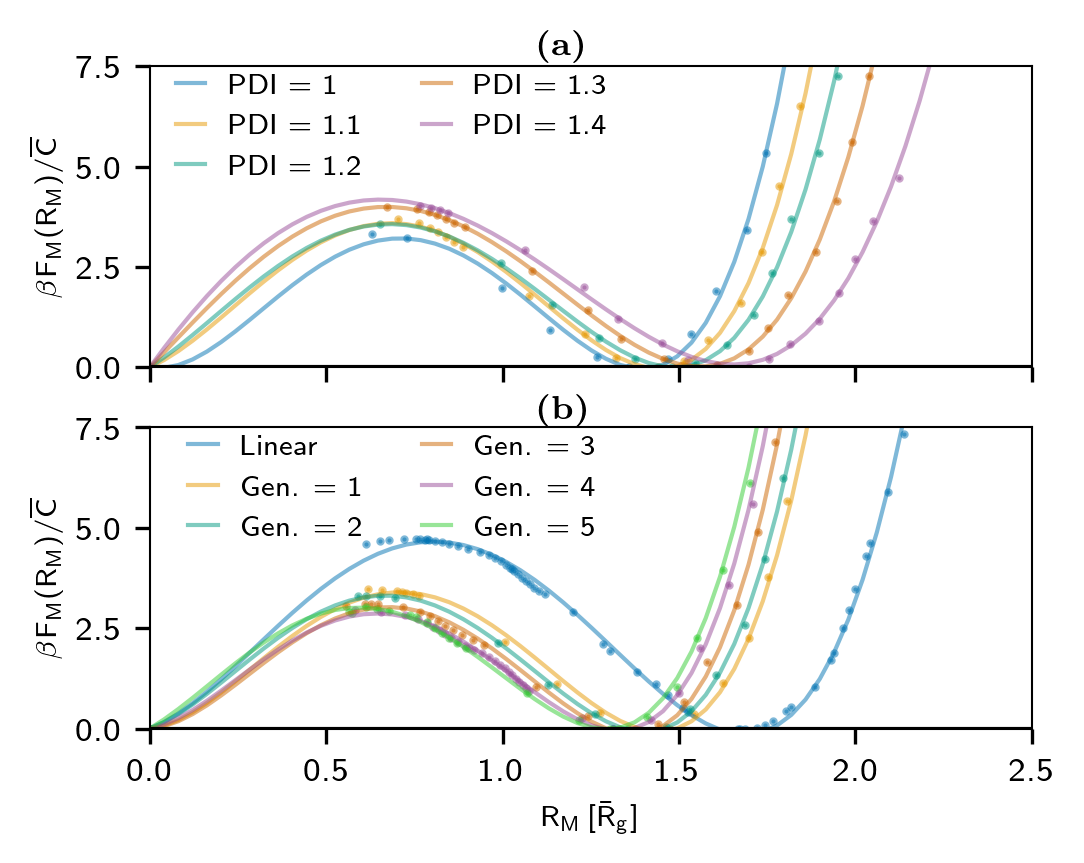

In [21]:

#FIGURE PARAMETERS
width = 3.5
height = width/1.3
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,1,  left=0.13, bottom=0.13, right=.97, top=.95 ,wspace=0.25)

ax0=plt.subplot(gs1[0,0])
ax1=plt.subplot(gs1[1,0])


pl_cl=colors(0.5)
cl=colors(1)


# test=np.loadtxt("../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_0.00125/shift_runs/shift_25.0/data/x_centered_radial_volume_fractions.dat",skiprows=0)


phi_cut=0.5 #Point where micelle radius is defined
mult=1e3
#Top plot LHBC

pt_rad_LHBC= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data/x*'
pt_det_LHBC= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data/det*'

fil_rad_LHBC = np.array(glob.glob(pt_rad_LHBC))
fil_det_LHBC = np.array(glob.glob(pt_det_LHBC))
dws= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fil_rad_LHBC])
# batches=np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fil_rad_LHBC])
shifts_LHBC = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in fil_rad_LHBC])


dw_chosen=[1,1.1,1.2,1.3,1.4]


for i in range(0,len(dw_chosen)):
    
    dw=dw_chosen[i]
    
#     for j in range(1,4):
        
#         batch=j+1
        
    fil_det=fil_det_LHBC[(dws==dw) ]
    fil_rad=fil_rad_LHBC[(dws==dw) ]
    shifts=shifts_LHBC[(dws==dw) ]

    rr_res,ene,shi_cases,volume= size_dis(fil_det,fil_rad,shifts,phi_cut) #Extract radius of micelle and corresponding energy given shi* folders


    rr=np.linspace(0,4,100)
    par, covariance = curve_fit(poly_fit, rr_res, ene)
    a,b,c,d=par[0] ,par[1],par[2],par[3]
    yfit=poly_fit(rr,a,b,c,d)

    lab="PDI = "+str(dw)
    print(lab)
    print(np.min(ene))

    ax0.scatter(rr_res,ene,c=pl_cl[i],s=1)
    ax0.plot(rr,yfit,c=pl_cl[i],label=lab)

    


    
    
    
    
    
    
    

#Bottom plot


 

#Linear
pt_rad_linear= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data*/x*'
pt_det_linear= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data*/det*'


fil_rad_linear = np.array(glob.glob(pt_rad_linear))
fil_det_linear = np.array(glob.glob(pt_det_linear))
shifts_linear = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fil_det_linear])

# print(np.sort(shifts_linear))
rr_res,ene,shi_cases,volume= size_dis(fil_det_linear,fil_rad_linear,shifts_linear,phi_cut) #Extract radius of micelle and corresponding energy given shi* folders


rr=np.linspace(0,4,100)
par, covariance = curve_fit(poly_fit, rr_res, ene)
a,b,c,d=par[0] ,par[1],par[2],par[3]
yfit=poly_fit(rr,a,b,c,d)

lab='Linear'
print(lab)
print(np.min(ene))

ax1.scatter(rr_res,ene,c=pl_cl[0],s=1)
ax1.plot(rr,yfit,c=pl_cl[0],label=lab)




#LDBC
pt_rad_LDBC= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data/x*'
pt_det_LDBC= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/shift_runs/shift_*/data/det*'

fil_rad_LDBC = np.array(glob.glob(pt_rad_LDBC))
fil_det_LDBC = np.array(glob.glob(pt_det_LDBC))
gens= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fil_rad_LDBC])
shifts_LDBC = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[3]) for i in fil_det_LDBC])


gen_chosen=[1,2,3,4,5]

for i in range(0,len(gen_chosen)):
    
    gen=gen_chosen[i]
    
    fil_det=fil_det_LDBC[gens==gen]
    fil_rad=fil_rad_LDBC[gens==gen]
    shifts=shifts_LDBC[gens==gen]
    
    rr_res,ene,shi_cases,volume= size_dis(fil_det,fil_rad,shifts,phi_cut) #Extract radius of micelle and corresponding energy given shi* folders

    
    rr=np.linspace(0,4,100)
    par, covariance = curve_fit(poly_fit, rr_res, ene)
    a,b,c,d=par[0] ,par[1],par[2],par[3]
    yfit=poly_fit(rr,a,b,c,d)

    lab="Gen. = "+str(gen_chosen[i])
    print(lab)
    print(np.min(ene))

    ax1.scatter(rr_res,ene,c=pl_cl[i+1],s=1)
    ax1.plot(rr,yfit,c=pl_cl[i+1],label=lab)

    
    
   








lin_zero=np.zeros(len(rr))
ax0.plot(rr,lin_zero,c='black')
ax1.plot(rr,lin_zero,c='black')
ax1.set_xlabel(r"$\mathrm{R_{M}\,[\bar{R}_{g}}]$",labelpad=3.0)
ax1.set_ylabel(r"$\mathrm{\beta F_{M}(R_{M}) / \overline{C}}$",labelpad=3.0)

ax0.set_yticks(np.arange(0,8,2.5))
ax1.set_yticks(np.arange(0,8,2.5))


ax1.set_xlim(0,2.5)
ax1.set_ylim(0,7.5)
ax1.legend(frameon=False,loc='center',bbox_to_anchor=(0.275, 0.8),ncol=2,handlelength=1)

ax0.set_xlim(0,2.5)
ax0.set_ylim(0,7.5)
ax0.legend(frameon=False,loc='center',bbox_to_anchor=(0.275, 0.8),ncol=2,handlelength=1)
ax0.set_ylabel(r"$\mathrm{\beta F_{M}(R_{M}) /\overline{C}}$",labelpad=3.0)


for label in ax0.get_xticklabels():
    label.set_visible(False)



fig.text(0.5,0.975,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.5,0.525,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')


plt.savefig("Main_figures/micelle_size_distribution.pdf")



 # Fig 6 - Asphericity energy penalty of micelles

In [22]:
def calc_asph(fil): #calculates asphericities based on filename
    
#     cut_off=7**2
    cut_off=0.05
    dat=np.loadtxt(fil,skiprows=0)
    x=dat[:,0]
    y=dat[:,1]
    z=dat[:,2]
    phi1=dat[:,3] #Only takeing phi1
    phi2=dat[:,4] #Only takeing phi1


    grid_size_x = np.max(x) 
    grid_size_y = np.max(y)  
    grid_size_z = np.max(z)   
    center_x =grid_size_x/2.0  # Change this to your desired X coordinate
    center_y = grid_size_y/2.0  # Change this to your desired Y coordinate
    center_z = grid_size_z/2.0  # Change this to your desired Z coordinate

    x_new=x-center_x
    y_new=y-center_y
    z_new=z-center_z
    rad_squared=x_new**2+y_new**2+z_new**2
    
#     comb=[x_new[rad_squared<=cut_off],y_new[rad_squared<=cut_off],z_new[rad_squared<=cut_off]]
#     phi1=phi1[rad_squared<=cut_off]
#     phi2=phi2[rad_squared<=cut_off]
#     rad_squared=rad_squared[rad_squared<=cut_off]

    comb=[x_new[phi1>=cut_off],y_new[phi1>=cut_off],z_new[phi1>=cut_off]]
    phi2=phi2[phi1>=cut_off]
    rad_squared=rad_squared[phi1>=cut_off]
    phi1=phi1[phi1>=cut_off]

    matrx1=np.zeros((3,3))
    matrx2=np.zeros((3,3))

    for row in range(0,3): #Moment of inertia tensor
        for col in range(0,3):


            xi=comb[row]
            xj=comb[col]
            summ=-xi*xj

            if row==col:
                summ+=rad_squared

            summ1=np.sum(summ*phi1)
            summ2=np.sum(summ*phi2)

            norm1=np.sum(phi1)
            norm2=np.sum(phi2)

            matrx1[row,col]=summ1/norm1
            matrx2[row,col]=summ2/norm2


    ei1, eivec1 = LA.eig(matrx1) #eigenvalues
    ei2, eivec2 = LA.eig(matrx2)

    asph1=np.real(ei1[2]**2-0.5*(ei1[0]**2+ei1[1]**2))
    asph2=np.real(ei2[2]**2-0.5*(ei2[0]**2+ei2[1]**2))
    return asph1,asph2

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)-1):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions

ptlhbc_vol= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/volume*'
ptlhbc_det= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/det*'
ptlhbc_x= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/x*'
ptlhbc_y= '../results/micelles/LHBC/dw*/SCF_runs_3d/batch_1/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/y*'

# ptlhbc= '../results/micelles/LHBC/dw_*/SCF_runs_3d/batch_*/phi_runs/chosen_case/phibar_*/data/volume*'
ptldbc_vol= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/volume*'
ptldbc_det= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/det*'
ptldbc_x= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/x*'
ptldbc_y= '../results/micelles/LDBC/gen*/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/y*'


ptlinear_vol= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/volume*'
ptlinear_det= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/det*'
ptlinear_x= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/x*'
ptlinear_y= '../results/micelles/linear/SCF_runs_3d/phi_runs/chosen_case/phibar_*/stretch_runs/asp*/data/y*'

fileslhbc_vol = np.array(glob.glob(ptlhbc_vol))
fileslhbc_det = np.array(glob.glob(ptlhbc_det))
fileslhbc_x = np.array(glob.glob(ptlhbc_x))
fileslhbc_y = np.array(glob.glob(ptlhbc_y))

filesldbc_vol = np.array(glob.glob(ptldbc_vol))
filesldbc_det = np.array(glob.glob(ptldbc_det))
filesldbc_x = np.array(glob.glob(ptldbc_x))
filesldbc_y = np.array(glob.glob(ptldbc_y))

fileslinear_vol = np.array(glob.glob(ptlinear_vol))
fileslinear_det = np.array(glob.glob(ptlinear_det))
fileslinear_x = np.array(glob.glob(ptlinear_x))
fileslinear_y = np.array(glob.glob(ptlinear_y))


dws= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in fileslhbc_vol])
asp_lhbc= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[4]) for i in fileslhbc_vol])

gens= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in filesldbc_vol])
asp_ldbc= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[3]) for i in filesldbc_vol])


asp_linear= np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[2]) for i in fileslinear_vol])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

linear  asp : 1.0 asp = 3.4573823803896175e-09
linear  asp : 1.2 asp = 0.043320678953657765
linear  asp : 1.4 asp = 0.15398078790999636
linear  asp : 1.6 asp = 0.2723299475785774
linear  asp : 1.8 asp = 0.38128323211360926
linear  asp : 2.0 asp = 0.4911199768388701
linear  asp : 2.2 asp = 0.6257896818162687
linear  asp : 2.4 asp = 0.8351315007389803
linear  asp : 2.6 asp = 1.252150080656917
linear  asp : 2.8 asp = 1.2692877334945503
linear  asp : 3.0 asp = 1.342371501876256
linear  asp : 3.2 asp = 1.3866492436828333
linear  asp : 3.4 asp = 1.5093370982681265
linear  asp : 3.6 asp = 1.7402721751693155
linear  asp : 3.8 asp = 2.171228566171301
linear  asp : 4.0 asp = 2.236223747013985
linear  asp : 4.2 asp = 2.553768841511813
linear  asp : 4.4 asp = 3.0290721620078
linear  asp : 4.6 asp = 3.5246587486669556
linear  asp : 4.8 asp = 4.055479011792537
linear  asp : 5.0 asp = 4.420990499618613
linear  asp : 5.2 asp = 4.6064468321218115
linear  asp : 5.4 asp = 4.607257281168069
linear  asp : 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]
Gen = 4 asp : 1.0 asp = 7.127123335948227e-10
Gen = 4 asp : 1.2 asp = -0.0026862499348100366
Gen = 4 asp : 1.4 asp = 0.06028798866434215
Gen = 4 asp : 1.6 asp = 0.09807840936358236
Gen = 4 asp : 1.8 asp = 0.09282959961981341
Gen = 4 asp : 2.0 asp = 0.15253100380768714
Gen = 4 asp : 2.2 asp = 0.2177827212112955
Gen = 4 asp : 2.4 asp = 0.24298644341632158
Gen = 4 asp : 2.6 asp = 0.3677765654336753
Gen = 4 asp : 2.8 asp = 0.4390136923288124
Gen = 4 asp : 3.0 asp = 0.4554305760342421
Gen = 4 asp : 3.2 asp = 0.45574168127429027
Gen = 4 asp : 3.4 asp = 0.5019365693933204
Gen = 4 asp : 3.6 asp = 0.5546434036376486
Gen = 4 asp : 3.8 asp = 0.6959400858818157
Gen = 4 asp : 4.0 asp = 0.7355745105703702
Gen = 4 asp : 4.2 asp = 0.7361232471275547
Gen = 4 asp : 4.4 asp = 0.7640679280271312
Gen = 4 asp : 4.6 asp = 0.7641623909615243
Gen = 4 asp : 4.8 asp = 0.7641546506932899
Gen = 4 asp : 5.0 as

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Gen = 4 asp : 6.0 asp = 1.6921765059852127
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]
Gen = 5 asp : 1.0 asp = 7.056191186904925e-10
Gen = 5 asp : 1.2 asp = -0.000822160502789826
Gen = 5 asp : 1.4 asp = 0.0627426074940427
Gen = 5 asp : 1.6 asp = 0.09081442052265976
Gen = 5 asp : 1.8 asp = 0.07981183031921013
Gen = 5 asp : 2.0 asp = 0.17272695283823603
Gen = 5 asp : 2.2 asp = 0.21521625269323685
Gen = 5 asp : 2.4 asp = 0.3018256409413633
Gen = 5 asp : 2.6 asp = 0.39845687122932927
Gen = 5 asp : 2.8 asp = 0.45968402751960724
Gen = 5 asp : 3.0 asp = 0.46188261780060835
Gen = 5 asp : 3.2 asp = 0.5052903519615093
Gen = 5 asp : 3.4 asp = 0.5065266029105868
Gen = 5 asp : 3.6 asp = 0.5655044714737267
Gen = 5 asp : 3.8 asp = 0.7500793483391932
Gen = 5 asp : 4.0 asp = 0.7500960729151063
Gen = 5 asp : 4.2 asp = 0.7521539010834504
Gen = 5 asp : 4.4 asp = 0.7899301156202716
Gen = 5 asp : 4.6 asp = 0.7900156971353391
Gen = 5 asp : 4.8 as

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Gen = 5 asp : 6.0 asp = 1.8285537274945005


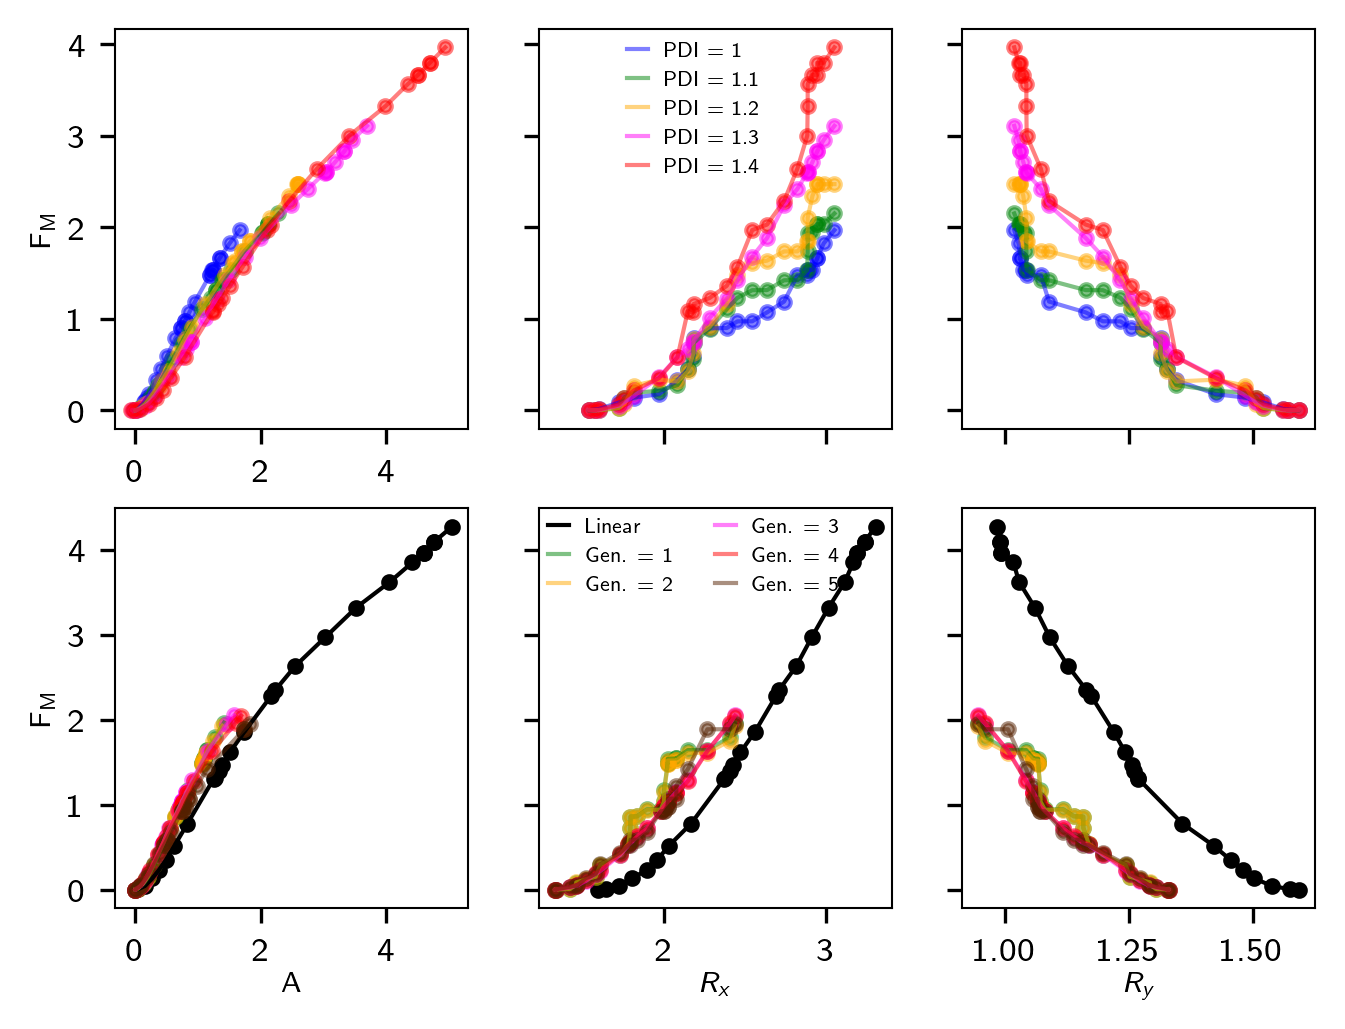

In [23]:


#FIGURE PARAMETERS
width = 5
#height = width/1.4
height = width/1.4
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=5,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs1=GridSpec(2,3,  left=0.15, bottom=0.14, right=.95, top=.96 )


ax10=plt.subplot(gs1[1,0])
ax11=plt.subplot(gs1[1,1],sharey=ax10)
ax12=plt.subplot(gs1[1,2],sharey=ax10)

ax00=plt.subplot(gs1[0,0],sharex=ax10)
ax01=plt.subplot(gs1[0,1],sharey=ax00,sharex=ax11)
ax02=plt.subplot(gs1[0,2],sharey=ax00,sharex=ax12)


pl_cl=[(0, 0, 1,0.5),(0.004, 0.522, 0.039,0.5),(1, 0.659, 0,0.5),(1, 0, 0.961,0.5),
        (1, 0, 0,0.5),(0.329, 0.131, 0.0,0.5),(0.129, 0.349, 0.204,0.5),(0.471, 0.616, 0.71,0.5)]

cl=[(0, 0, 1),(0.004, 0.522, 0.039),(1, 0.659, 0),(1, 0, 0.961),
        (1, 0, 0),(0.329, 0.131, 0.0)]


symbols=['o','s','^'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d

mult=1e0

phi_cut=0.5



#LHBC part
dw_chosen=[1,1.1,1.2,1.3,1.4]

for i in range(0,len(dw_chosen)):  #looping over PDIs
    
    asph1s=[]
    asph2s=[]
    enedif=[]
    rr_resx=[]
    rr_resy=[]

    asp_un=np.unique(asp_lhbc[(dws==dw_chosen[i])])
    for j in range(0,len(asp_un)):
        
#         print("dw : " +str(dw_chosen[i])+ " asp : "+str(asp_un[j]))
        
        fil=fileslhbc_vol[(dws==dw_chosen[i]) & (asp_un[j]==asp_lhbc)][0]
        fil_det=fileslhbc_det[(dws==dw_chosen[i]) & (asp_un[j]==asp_lhbc)][0]
        
        fil_x=fileslhbc_x[(asp_un[j]==asp_lhbc)][0]
        data_x=np.loadtxt(fil_x,skiprows=0)
        rr_prof=data_x[:,0]
        vol1=data_x[:,1]
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]  
        radii=inverse_interp(rr_prof,vol1,phi_cut)
        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue
        rr_resx.append(radii[-1])

        fil_y=fileslhbc_y[(asp_un[j]==asp_lhbc)][0]
        data_y=np.loadtxt(fil_y,skiprows=0)
        rr_prof=data_y[:,0]
        vol1=data_y[:,1]
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]  
        radii=inverse_interp(rr_prof,vol1,phi_cut)
        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue
        rr_resy.append(radii[-1])
        
        
        
        asph1,asph2 = calc_asph(fil)

        

        data_det=np.loadtxt(fil_det,skiprows=0)
        ene=data_det[2]
        rho=data_det[7]
        # edif=data_det[17]
        edif=data_det[2]-data_det[11]

        volume=data_det[9]
        
        if asp_un[j]==1:
            ezero=edif

            
        enedif.append(edif)

            
        asph1s.append(asph1)
        asph2s.append(asph2)

    lab="PDI = "+str(dw_chosen[i])
    ax00.scatter(np.array(asph1s),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-')
    ax01.scatter(np.array(rr_resx),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-')
    ax02.scatter(np.array(rr_resy),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-')

    ax00.plot(np.array(asph1s),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-',label=lab)
    ax01.plot(np.array(rr_resx),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-',label=lab)
    ax02.plot(np.array(rr_resy),np.array(enedif)-ezero,c=pl_cl[i],linestyle='-',label=lab)
    

    
   
    
# ax.set_yscale('log') 
    
ax00.set_ylabel(r"$\mathrm{F_{M}}$",labelpad=3.0)


for label in ax01.get_yticklabels():
    label.set_visible(False)
for label in ax02.get_yticklabels():
    label.set_visible(False)

for label in ax01.get_xticklabels():
    label.set_visible(False)
for label in ax01.get_xticklabels():
    label.set_visible(False)
for label in ax02.get_xticklabels():
    label.set_visible(False) 
    
ax01.legend(frameon=False,loc='center',bbox_to_anchor=(0.44, 0.8),handlelength=1, ncol=1)

# #Linear part    


asph1s=[]
asph2s=[]
enedif=[]
rr_resx=[]
rr_resy=[]

asp_un=np.unique(asp_linear)
for j in range(0,len(asp_un)):
    

    fil=fileslinear_vol[(asp_un[j]==asp_linear)][0]
    fil_det=fileslinear_det[(asp_un[j]==asp_linear)][0]
    
    
    fil_x=fileslinear_x[(asp_un[j]==asp_linear)][0]
    data_x=np.loadtxt(fil_x,skiprows=0)
    rr_prof=data_x[:,0]
    vol1=data_x[:,1]
    vol1=vol1[rr_prof>=0]
    rr_prof=rr_prof[rr_prof>=0]  
    radii=inverse_interp(rr_prof,vol1,phi_cut)
    if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
        continue
    rr_resx.append(radii[-1])
    
    fil_y=fileslinear_y[(asp_un[j]==asp_linear)][0]
    data_y=np.loadtxt(fil_y,skiprows=0)
    rr_prof=data_y[:,0]
    vol1=data_y[:,1]
    vol1=vol1[rr_prof>=0]
    rr_prof=rr_prof[rr_prof>=0]  
    radii=inverse_interp(rr_prof,vol1,phi_cut)
    if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
        continue
    rr_resy.append(radii[-1])    
    
    
    
    asph1,asph2 = calc_asph(fil)



    data_det=np.loadtxt(fil_det,skiprows=0)
    ene=data_det[2]
    rho=data_det[7]
    # edif=data_det[17]
    edif=data_det[2]-data_det[11]
    volume=data_det[9]

    if asp_un[j]==1:
        ezero=edif
        
    enedif.append(edif)
    asph1s.append(asph1)
    asph2s.append(asph2)
    print("linear "+ " asp : " +str(asp_un[j])+" asp = "+str(asph1))
lab="Linear"
ax10.scatter(np.array(asph1s),np.array(enedif)-ezero,c='black',linestyle='-')
ax11.scatter(np.array(rr_resx),np.array(enedif)-ezero,c='black',linestyle='-')
ax12.scatter(np.array(rr_resy),np.array(enedif)-ezero,c='black',linestyle='-')

ax10.plot(np.array(asph1s),np.array(enedif)-ezero,c='black',linestyle='-',label=lab)
ax11.plot(np.array(rr_resx),np.array(enedif)-ezero,c='black',linestyle='-',label=lab)
ax12.plot(np.array(rr_resy),np.array(enedif)-ezero,c='black',linestyle='-',label=lab)
 




#LDBC part
gen_chosen=[1,2,3,4,5]


for i in range(0,len(gen_chosen)):  #looping over PDIs
    
    asph1s=[]
    asph2s=[]
    enedif=[]
    rr_resx=[]
    rr_resy=[]

    asp_un=np.unique(asp_ldbc[(gens==gen_chosen[i])])
    print(asp_un)
    for j in range(0,len(asp_un)):
        
        


#         if kapcon_un[j]==0.02:
#             continue
        fil=filesldbc_vol[(gens==gen_chosen[i]) & (asp_un[j]==asp_ldbc)][0]
        fil_det=filesldbc_det[(gens==gen_chosen[i]) & (asp_un[j]==asp_ldbc)][0]
        
        fil_x=filesldbc_x[(asp_un[j]==asp_ldbc)][0]
        data_x=np.loadtxt(fil_x,skiprows=0)
        rr_prof=data_x[:,0]
        vol1=data_x[:,1]
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]  
        radii=inverse_interp(rr_prof,vol1,phi_cut)
        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue
        rr_resx.append(radii[-1])

        fil_y=filesldbc_y[(asp_un[j]==asp_ldbc)][0]
        data_y=np.loadtxt(fil_y,skiprows=0)
        rr_prof=data_y[:,0]
        vol1=data_y[:,1]
        vol1=vol1[rr_prof>=0]
        rr_prof=rr_prof[rr_prof>=0]  
        radii=inverse_interp(rr_prof,vol1,phi_cut)
        if len(radii) != 1: #Ignoring cases where convergent case is not micelle like
            continue
        rr_resy.append(radii[-1])
        
        
        
        asph1,asph2 = calc_asph(fil)

        

        data_det=np.loadtxt(fil_det,skiprows=0)
        ene=data_det[2]
        rho=data_det[7]
        # edif=data_det[17]
        edif=data_det[2]-data_det[11]
        volume=data_det[9]
        
        if asp_un[j]==1:
            ezero=edif

            
        enedif.append(edif)
        if gen_chosen[i]>=4:

            print("Gen = "+str(gen_chosen[i])+" asp : "+str(asp_un[j])+" asp = "+str(asph1))
            
        asph1s.append(asph1)
        asph2s.append(asph2)

    lab="Gen. = "+str(gen_chosen[i])
    ax10.scatter(np.array(asph1s),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-')
    ax11.scatter(np.array(rr_resx),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-')
    ax12.scatter(np.array(rr_resy),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-')

    ax10.plot(np.array(asph1s),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-',label=lab)
    ax11.plot(np.array(rr_resx),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-',label=lab)
    ax12.plot(np.array(rr_resy),np.array(enedif)-ezero,c=pl_cl[i+1],linestyle='-',label=lab)
    
    


    
    
# ax.set_yscale('log') 
    
ax10.set_ylabel(r"$\mathrm{F_{M}}$",labelpad=3.0)
ax10.set_xlabel("A",labelpad=1.0)
# ax0.set_xlim(0,5)
# ax0.set_ylim(0,0.02)

ax11.set_xlabel(r"$R_{x}$",labelpad=1.0)
ax12.set_xlabel(r"$R_{y}$",labelpad=1.0)

for label in ax11.get_yticklabels():
    label.set_visible(False)
for label in ax12.get_yticklabels():
    label.set_visible(False)
    
ax11.legend(frameon=False,loc='center',bbox_to_anchor=(0.44, 0.88),handlelength=1, ncol=2)


plt.savefig("Assisting_figures/edif_vs_asphericities.pdf")

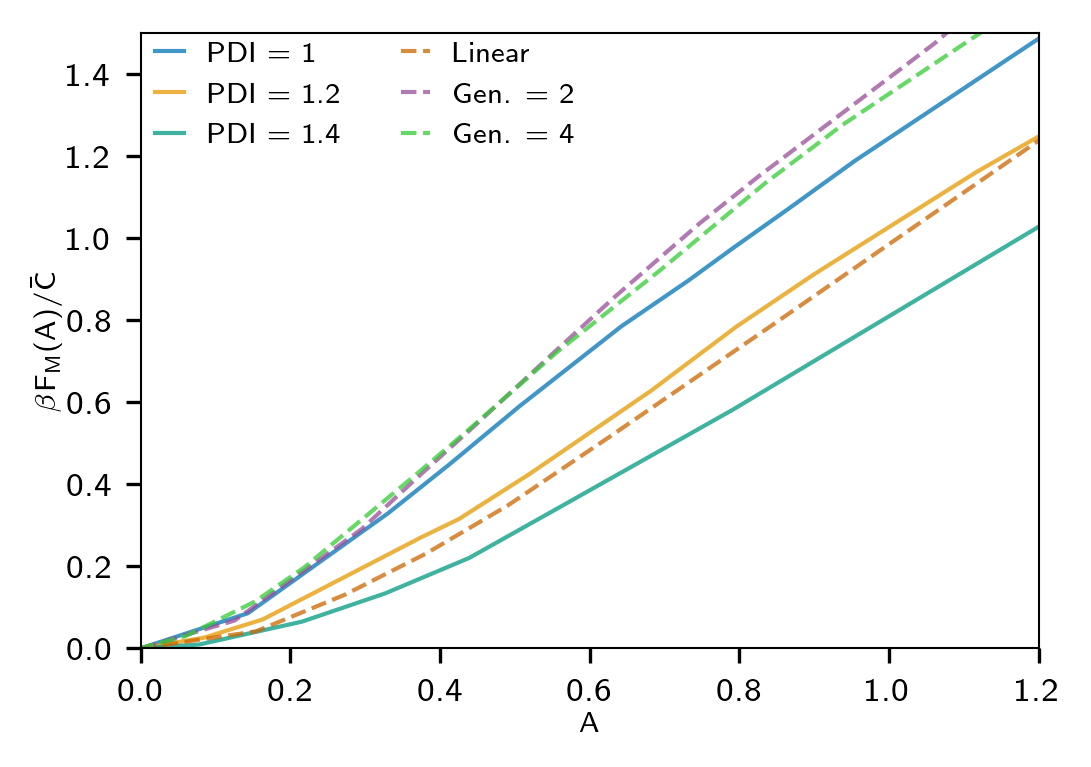

In [24]:
import matplotlib.patches as mpatches
import matplotlib.image as mpimg



#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/1.4
fig2 = plt.figure(constrained_layout=False, dpi=300)
fig2.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=7,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
gs2=GridSpec(1,1,  left=0.12, bottom=0.14, right=.975, top=.96 )
ax0=plt.subplot(gs2[0,0])
axs_new=[ax0]
axs=[ax00,ax10]

pl_cl=colors(0.75)



# # Load the image
# image1 = mpimg.imread('Asp_0.0.jpg')
# image2 = mpimg.imread('Asp_2.54.jpg')

# # Display the image
# ax0.imshow(image1)

threshold=0.05 #Threshold for points too close to each other

symbols=['o','s','^'] 
linstyl=['-','--'] 

chosen_plots_dw=[0,2,4]
chosen_plots_ldbc=[0,2,4]
mult=1
# Iterate over each Axes in the original figure
j=0
for i, ax in enumerate(axs):
    
    lines=ax.get_lines()
    k=0
    for line in lines:
        
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ind_sort=np.argsort(x_data)
        x_data=x_data[ind_sort]
        y_data=y_data[ind_sort]
        label = line.get_label()

        #Removing points that are too close to each other
        x_data_rolled=np.roll(x_data, 1)
        dif=np.abs(x_data-x_data_rolled)
        min_ind=np.argmin(dif)
        x_data=x_data[~(dif<=threshold)]
        y_data=y_data[~(dif<=threshold)]


        if i==0 and np.isin(k,chosen_plots_dw):
            ax0.plot(x_data, y_data*mult, label=f'{label}', linestyle=linstyl[i],c=pl_cl[j])
            j+=1
        elif i==1 and np.isin(k,chosen_plots_ldbc):
            ax0.plot(x_data, y_data*mult, label=f'{label}', linestyle=linstyl[i],c=pl_cl[j])
            j+=1

            
        k+=1


#     ax0.legend()

ax0.legend(frameon=False,loc='center',bbox_to_anchor=(0.25, 0.9),handlelength=1, ncol=2)
   
ax0.set_xlim(0,1.2)
ax0.set_ylim(0,1.5)

# ax0.set_ylabel(r"$\beta\mathrm{F_{M}(A)/n_{b}\times10^{-3}}$",labelpad=1.0)
ax0.set_ylabel(r"$\mathrm{\beta F_{M}(A)/\Bar{C}}$",labelpad=1.0)
ax0.set_xlabel("A",labelpad=1.0)





plt.savefig("Main_figures/asphericities_combined.pdf")

# Fig 7 - Encapsulation CMCS

In [25]:

pt1d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d= '../results/micelles/LHBC/dw_*/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d = np.array(glob.glob(pt1d))
files2d = np.array(glob.glob(pt2d))
files3d = np.array(glob.glob(pt3d))


dws1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d])
dws2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d])
dws3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d])



pt1d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_ldbc= '../results/micelles/LDBC/gen*/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d_ldbc = np.array(glob.glob(pt1d_ldbc))
files2d_ldbc = np.array(glob.glob(pt2d_ldbc))
files3d_ldbc = np.array(glob.glob(pt3d_ldbc))


gen1d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files1d_ldbc])
gen2d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files2d_ldbc])
gen3d = np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files3d_ldbc])


gen_num=len(np.unique(gen3d))


pt1d_linear= '../results/micelles/linear/encapsulation/SCF_runs_1d/phi_runs/all_details.dat'
pt2d_linear= '../results/micelles/linear/encapsulation/SCF_runs_2d/phi_runs/all_details.dat'
pt3d_linear= '../results/micelles/linear/encapsulation/SCF_runs_3d/phi_runs/all_details.dat'


files1d_linear = np.array(glob.glob(pt1d_linear))
files2d_linear = np.array(glob.glob(pt2d_linear))
files3d_linear = np.array(glob.glob(pt3d_linear))


rhos_lhbc_pt='../results/micelles/LHBC/dw_*/enc*/SCF_runs_*/p*/c*/ph*/analysis/micelle_rhos.dat'
files_rhos_lhbc = np.array(glob.glob(rhos_lhbc_pt))
dws_rhos=np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files_rhos_lhbc])

rhos_ldbc_pt='../results/micelles/LDBC/gen*/enc*/SCF_runs_*/p*/c*/ph*/analysis/micelle_rhos.dat'
files_rhos_ldbc = np.array(glob.glob(rhos_ldbc_pt))
gen_rhos=np.array([float(re.findall(r"[-+]?(?:\d*\.*\d+)",i)[0]) for i in files_rhos_ldbc])

rhos_linear_pt='../results/micelles/linear/enc*/SCF_runs_*/p*/c*/ph*/analysis/micelle_rhos.dat'
files_rhos_linear = np.array(glob.glob(rhos_linear_pt))



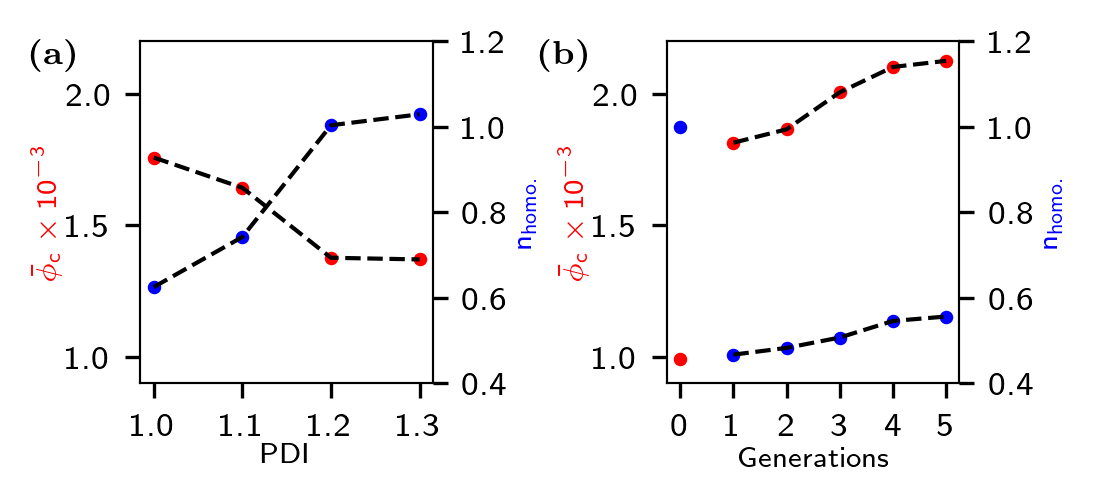

In [27]:
def poly_fit(x,a,b,c,d):
    y = a*x+b*x**2+c*x**3+d*x**4
    return y

def inverse_interp(x, y, y_given):
    solutions=[]
    
    
    for i in range(1,len(y)):
       
        
        if ((y[i] >= y_given) and (y[i-1] <= y_given)) or ((y[i] <= y_given) and (y[i-1] >= y_given)):
            
            m=(y[i]-y[i-1])/(x[i]-x[i-1])
            x_given=x[i]+(y_given-y[i])/m
            solutions.append(x_given)
    
    solutions=np.unique(np.array(solutions))
    
    return solutions
 

def unionarrays(arrays):
    result = arrays[0]  # Start with the first array
    for array in arrays[1:]:
        result = np.union1d(result, array)  # Union of the current result with the next array
    return result


#FIGURE PARAMETERS
width = 3.5
#height = width/1.4
height = width/2.3
fig = plt.figure(constrained_layout=False, dpi=300)
fig.set_size_inches(width, height)


plt.rc('font', family='sans-serif', size=8)
plt.rc('text', usetex=True)
plt.rc('mathtext',fontset='dejavusans')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=7)
plt.rc('legend', fontsize=5,fancybox=False, framealpha=0.0)
plt.rc('axes', linewidth=0.5)
plt.rc("savefig", dpi=300)
plt.rc("lines", linewidth=1., markersize=3, markeredgewidth=2.5)
plt.rcParams['axes.titlesize'] = 8
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{stmaryrd}\usepackage{sfmath}'

##### Adding plots
# gs1=GridSpec(2,1,  left=0.15, bottom=0.14, right=.95, top=.96 )
# ax0=plt.subplot(gs1[0,0])
# ax1=plt.subplot(gs1[1,0])

gs1=GridSpec(1,2,  left=0.11, bottom=0.2, right=.89, top=.95,wspace=0.8 )
ax0=plt.subplot(gs1[0,0])
ax1=plt.subplot(gs1[0,1])

pl_cl=colors(0.5)
cl=colors(1)




phibarss=[]
types=[] # 0 =vesicle 1=cylinder 2=sphere


phihomo=0.00001 #Homopolymer phibar used

mult=1e3
mult_phi=1e3

#LHBC
symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
dw_chosen=[1,1.1,1.2,1.3]

for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    inter_pts_means=[]
    inter_pts_stds=[]
    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d
            dws=dws1d
        if p==1:
            files=files2d
            dws=dws2d
            
        if p==2:
            files=files3d
            dws=dws3d
        
        edif_full=[]  
        phis_full=[]


        fil=files[(dws==dw_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]
        edif=dat[:,17]
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]


        inter_pt=inverse_interp(phibar[stat==0],edif[stat==0],0)[-1]

        inter_full.append(inter_pt)

        
        edif[stat!=0]=np.nan #simulation that didnt converge coreectly are not accounted in the mean and std calc
        phibar[stat!=0]=np.nan
        edif_full.append(edif)
        phis_full.append(phibar)
        

        lab="PDI = "+str(dw_chosen[i])
        
#         if p==0:
#             ax0.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i],label=lab)
#         else:
#             ax0.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i])   


#     print(np.array(inter_full))
    pt=np.argmin(np.array(inter_full))
    
    phibarss.append(inter_full[pt]-phihomo)
    types.append(pt)

        
    x=[inter_full[pt]]
    y=0
    
#     ax0.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[i],s=10.0)  



#Linear

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d


inter_full=[]

for p in range(0,3): #looping over geometries
    if p==0:
        files=files1d_linear
    if p==1:
        files=files2d_linear
    if p==2:
        files=files3d_linear


    edif_full=[]  
    phis_full=[]


    fil=files[0]
    dat=np.loadtxt(fil,skiprows=0)
    phibar=dat[:,16]
    edif=dat[:,17]
    stat=dat[:,0]

    phibar=phibar[abs(edif)>=1e-5]
    stat=stat[abs(edif)>=1e-5]
    edif=edif[abs(edif)>=1e-5]

    phibar=phibar[stat==0]
    edif=edif[stat==0]

#     print(inverse_interp(phibar,edif,0))
    inter_pt=inverse_interp(phibar,edif,0)[-1]
    inter_full.append(inter_pt)


#     if p==0:
#         ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[0],label='Gen. = 0')

#     else:
#         ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[0])


pt=np.argmin(np.array(inter_full))
x=[inter_full[pt]]
y=0
# ax1.scatter(np.array(x)*mult_phi,y,marker=symbols[pt],c=pl_cl[len(gen_chosen)],s=10.0)
phibarss.append(inter_full[pt]-phihomo)
types.append(pt)

# ax1.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[0],s=10.0)
    
    

#LDBC

symbols=['s','^','o'] # circle = 1d ,  square = 2d , triangle=3d
linstyl=['-','--','dotted'] # - = 1d , -- = 2d , dotted=3d
gen_chosen=[1,2,3,4,5]

for i in range(0,len(gen_chosen)):  #looping over PDIs
  

    inter_full=[]

    for p in range(0,3): #looping over geometries
        if p==0:
            files=files1d_ldbc
            gen=gen1d
        if p==1:
            files=files2d_ldbc
            gen=gen2d
        if p==2:
            files=files3d_ldbc
            gen=gen3d
          
        
        edif_full=[]  
        phis_full=[]
        
       
        fil=files[(gen==gen_chosen[i])][0]
        dat=np.loadtxt(fil,skiprows=0)
        phibar=dat[:,16]
        edif=dat[:,17]
        stat=dat[:,0]

        phibar=phibar[abs(edif)>=1e-5]
        stat=stat[abs(edif)>=1e-5]
        edif=edif[abs(edif)>=1e-5]

        phibar=phibar[stat==0]
        edif=edif[stat==0]
        inter_pt=inverse_interp(phibar,edif,0)[-1]
        inter_full.append(inter_pt)

        
#         if p==0:
#             ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i+1],label='Gen. = '+str(gen_chosen[i]))

#         else:
#             ax1.plot((phibar-phihomo)*mult_phi,edif*mult,linestyle=linstyl[p],c=pl_cl[i+1])
 

    pt=np.argmin(np.array(inter_full))
    x=[inter_full[pt]]
    y=0
#     ax1.scatter((np.array(x)-phihomo)*mult_phi,y,marker=symbols[pt],c=pl_cl[i+1],s=10.0)
    phibarss.append(inter_full[pt]-phihomo)
    types.append(pt)
    

    
    
    
    
    
yphimin=0.9
yphimax=2.2
yphi=yphimax-yphimin

yrhomin=0.4
yrhomax=1.2
yrho=yrhomax-yrhomin


rhosss=[]
#LHBC
for i in range(0,len(dw_chosen)):  #looping over PDIs
  
    fil=files_rhos_lhbc[(dws_rhos==dw_chosen[i])][0]
    dat=np.loadtxt(fil,skiprows=0)
    rhosss.append(dat[-1])

#Linear
fil=files_rhos_linear[0]
dat=np.loadtxt(fil,skiprows=0)
rhosss.append(dat[-1])

#LDBC
for i in range(0,len(gen_chosen)):  #looping over PDIs
  
    fil=files_rhos_ldbc[(gen_rhos==gen_chosen[i])][0]
    dat=np.loadtxt(fil,skiprows=0)
    rhosss.append(dat[-1])
    

#Left plot
sym_siz=[5,5,5]

 
ax0.plot(dw_chosen,np.array(phibarss[0:len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   

for i in range(0,len(dw_chosen)):
    
    pt=types[i]
    x=dw_chosen[i]
    y=phibarss[i]*mult_phi
    if pt==2:
        ax0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-yleft*0.05), 0.0001, yleft*0.1,edgecolor='red',facecolor='red')
        ax0.add_patch(rect)
    elif pt==0 :
        ax0.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='red')
 


linear_nn_hh=rhosss[len(dw_chosen)] #Normalising quantity for homopolymer molecule numbers



ax01=ax0.twinx()

ax01.plot(dw_chosen,np.array(rhosss[0:len(dw_chosen)])/linear_nn_hh,linestyle='--',c='black',markersize=1)   

for i in range(0,len(dw_chosen)):
    
    pt=types[i]
    x=dw_chosen[i]
    y=rhosss[i]/linear_nn_hh
    if pt==2:
        ax01.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='blue', edgecolors='blue')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-yright*0.05), 0.0001, yright*0.10,edgecolor='blue',facecolor='blue')
        ax01.add_patch(rect)
    elif pt==0 :
        ax01.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='blue')
        

ax0.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0,c='red')
ax0.set_xlabel(r"PDI",labelpad=0.0) 
# ax01.set_ylabel(r"$\mathrm{\langle \phi_h \rangle\times 10^{-3}}$",labelpad=1.0,c='blue')
ax01.set_ylabel(r"$\mathrm{n_{homo.}}$",labelpad=1.0,c='blue')




    
#Right plot
genss=[0]+gen_chosen


# ax1.plot(genss,np.array(phibarss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
ax1.plot(genss[0],np.array(phibarss[len(dw_chosen)])*mult_phi,linestyle='--',c='black',markersize=1)   
ax1.plot(genss[1:],np.array(phibarss[len(dw_chosen)+1:])*mult_phi,linestyle='--',c='black',markersize=1)   

for i in range(len(dw_chosen),len(dw_chosen)+len(genss)):
    
    pt=types[i]
    x=genss[i-len(dw_chosen)]
    y=phibarss[i]*mult_phi
    if pt==2:
        ax1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='red', edgecolors='red')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.1), 0.0001, 0.2,edgecolor='red',facecolor='red')
        ax1.add_patch(rect)
    elif pt==0 :
        ax1.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='red')
        

ax1.set_xlabel(r"Generations",labelpad=1.0)
    
    
    
ax11=ax1.twinx()


# ax11.plot(genss,np.array(rhosss[len(dw_chosen):])*mult_phi,linestyle='--',c='black',markersize=1)   
ax11.plot(genss[0],np.array(rhosss[len(dw_chosen)])/linear_nn_hh,linestyle='--',c='black',markersize=1)   
ax11.plot(genss[1:],np.array(rhosss[len(dw_chosen)+1:])/linear_nn_hh,linestyle='--',c='black',markersize=1)   

for i in range(len(dw_chosen),len(dw_chosen)+len(genss)):
    
    pt=types[i]
    x=genss[i-len(dw_chosen)]
    y=rhosss[i]/linear_nn_hh
    if pt==2:
        ax11.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='blue', edgecolors='blue')  
    elif pt==1 :
        rect = patches.Rectangle((x, y-0.05), 0.0001, 0.1,edgecolor='blue',facecolor='blue')
        ax11.add_patch(rect)
    elif pt==0 :
        ax11.scatter(x,y,marker=symbols[pt],s=sym_siz[pt],facecolors='none', edgecolors='blue')
 

 
ax0.set_ylim(yphimin,yphimax) 
ax1.set_ylim(yphimin,yphimax) 

ax01.set_ylim(yrhomin,yrhomax) 
ax11.set_ylim(yrhomin,yrhomax) 

ax1.set_ylabel(r"$\mathrm{\Bar{\phi}_{c}\times 10^{-3}}$",labelpad=1.0,c='red')
# ax11.set_ylabel(r"$\mathrm{\langle \phi_h \rangle\times 10^{-3}}$",labelpad=1.0,c='blue')
ax11.set_ylabel(r"$\mathrm{n_{homo.}}$",labelpad=1.0,c='blue')

    
ax0.set_xticks([1.0,1.1,1.2,1.3]) 
ax1.set_xticks([0,1,2,3,4,5]) 

ax11.set_yticks(np.arange(0.4,1.4,0.2)) 
ax01.set_yticks(np.arange(0.4,1.4,0.2)) 

fig.text(0.005,0.92,r'\bf{(a) }', horizontalalignment='left', verticalalignment='center')
fig.text(0.49,0.92,r'\bf{(b) }', horizontalalignment='left', verticalalignment='center')


plt.savefig("Main_figures/encaps.pdf")